# Task 1 - Exploratory Data Analysis (EDA)

## Initial data exploration
Connect and load the database - noshow.db. Have a general idea of the type of data in the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import numpy as np
%matplotlib inline

def get_db_conn():
    """Establishes and returns a connection to the SQLite database."""
    engine = create_engine("sqlite:///data/noshow.db")
    return engine

engine = get_db_conn()
load_sql = f"""SELECT * FROM noshow ;"""
df = pd.read_sql(load_sql, engine)

#display(df)
#display(df.dtypes)
#display(df.info())
#display(df.describe(include='all'))
#display(df.isnull().sum())

### Data overview

In [13]:
display(df)

display(df.info())

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
0,94113,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.0
1,86543,0.0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,SGD$ 1351.22,Website,2,0.0
2,75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0.0
3,66947,1.0,Orchard,September,October,1.0,October,3.0,China,Yes,Single,SGD$ 666.04,Website,1,0.0
4,106390,0.0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,USD$ 665.37,Website,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119386,4823,0.0,Changi,September,April,3.0,April,5.0,China,Yes,King,USD$ 612.18,Website,1,1.0
119387,25062,0.0,Orchard,March,December,30.0,January,3.0,China,Yes,King,USD$ 1041.29,Email,2,0.0
119388,81936,1.0,Changi,September,March,31.0,April,1.0,Indonesia,Yes,King,USD$ 641.47,Email,1,2.0
119389,6738,0.0,Changi,February,February,25.0,February,27.0,China,Yes,None,SGD$ 886.35,Website,2,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   booking_id      119391 non-null  int64  
 1   no_show         119390 non-null  float64
 2   branch          119390 non-null  object 
 3   booking_month   119390 non-null  object 
 4   arrival_month   119390 non-null  object 
 5   arrival_day     119390 non-null  float64
 6   checkout_month  119390 non-null  object 
 7   checkout_day    119390 non-null  float64
 8   country         119390 non-null  object 
 9   first_time      119390 non-null  object 
 10  room            97778 non-null   object 
 11  price           94509 non-null   object 
 12  platform        119390 non-null  object 
 13  num_adults      119390 non-null  object 
 14  num_children    119390 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 13.7+ MB


None

Insights:
- Incorrect data type for no_show(float64), should be int64.
- Incorrect data type for arrival_day(float64), should be int64.
- Incorrect data type for checkout_day(float64), should be int64.
- Incorrect data type for first_time(object), should be int64.
- Incorrect data type for price(object), should be float64.
- Incorrect data type for num_adults(object), should be int64.
- Incorrect data type for num_children(float64), should be int64.
- Price values is in different currencies - SGD or USD.
- Consider standardize all values in string to lowercases.
- Consider adding another feature - num_days_stay ?
  
Preprocessing:
- convert no_show to int64.
- convert arrival_day to int64.
- convert checkout_day to int64.
- convert first_time to int64.
- convert num_adults to int64.
- convert num_children to int64.
- convert price to float64.
- Standardize the currency to SGD, by converting all USD price to SGD by multipy by 1.3 (USD 1 = SGD 1.3).
- Standardize all string values in dataset to lowercases.
  

Insights: General overview of the data shows issues that will require data preprocessing before model training, columns such as no_show, arrival_day, checkout_day, num_children will need to be converted to integer type, price will need to be converted to standardize currency, and converted to float data type. All String data type columns will be better to converted to lower case, in case there are values in lower case. need lower case all string in fields, column name, change USD to SGD, convert to float, replace space to "_" in columns name, convert object to int/float.

### Null columns check

In [9]:
# Nulls count for columns with percentage
null_summary = pd.DataFrame({
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df)) * 100
})
display(null_summary)
      

,Null Count,Null Percentage
booking_id,0,0.000000
no_show,1,0.000838
branch,1,0.000838
booking_month,1,0.000838
arrival_month,1,0.000838
arrival_day,1,0.000838
checkout_month,1,0.000838
checkout_day,1,0.000838
country,1,0.000838
first_time,1,0.000838


In [10]:
display(df[df["no_show"].isna()]) #check the single row with no_show == null

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
111598,115536,NaN,None,None,None,NaN,None,NaN,None,None,None,None,None,None,NaN


In [11]:
display(df[df["room"].isna()])    #check rows with "room" == null

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
5,55212,0.0,Orchard,November,September,12.0,September,13.0,Indonesia,Yes,None,SGD$ 1499.61,Website,2,2.0
8,109456,1.0,Changi,January,June,27.0,June,28.0,China,Yes,None,USD$ 658.75,Email,2,1.0
9,31117,0.0,Orchard,October,March,22.0,March,24.0,China,Yes,None,USD$ 962.75,Website,1,1.0
17,85014,0.0,Orchard,March,May,10.0,May,12.0,Indonesia,Yes,None,SGD$ 1309.13,Website,one,0.0
19,3158,0.0,Orchard,March,March,30.0,March,31.0,China,Yes,None,USD$ 1056.7,Website,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119357,7903,0.0,Orchard,August,October,12.0,October,13.0,Indonesia,Yes,None,USD$ 534.97,Email,1,1.0
119358,108888,0.0,Orchard,December,February,10.0,February,12.0,China,Yes,None,SGD$ 1200.95,Website,2,0.0
119370,53658,1.0,Changi,April,October,4.0,October,6.0,China,Yes,None,SGD$ 844.46,Agent,one,0.0
119378,91840,0.0,Orchard,September,September,15.0,September,-16.0,Australia,Yes,None,SGD$ 1331.2,Agent,2,0.0


In [12]:
display(df[df["price"].isna()])   #check rows with price == null

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
2,75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0.0
7,23137,0.0,Changi,July,November,18.0,November,19.0,India,Yes,King,None,Email,2,1.0
15,99392,0.0,Orchard,December,August,13.0,August,15.0,India,Yes,Queen,None,Phone,1,1.0
16,28623,0.0,Changi,December,February,22.0,February,23.0,Indonesia,Yes,King,None,Website,2,2.0
18,28009,0.0,Changi,June,July,30.0,July,31.0,Japan,Yes,King,None,Agent,two,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119364,25132,0.0,Changi,April,September,4.0,September,5.0,Malaysia,Yes,King,None,Agent,1,2.0
119367,41443,0.0,Changi,May,September,3.0,September,4.0,Japan,Yes,King,None,Website,1,2.0
119374,116904,0.0,Changi,January,February,15.0,February,-16.0,India,Yes,Single,None,Website,1,1.0
119382,8794,0.0,Orchard,April,February,7.0,February,9.0,China,No,King,None,Website,1,2.0


Insights: 
- A row with all empty values booking_id == 115536.
- 21613 with room being None type.
- 24882 with price being None.

Preprocessing:
- Drop row with booking_id == 115536.
- Impute 21613 rows with room type according to nearest price.
- Impute 24882 rows with price = 0.


### Duplicated rows

In [5]:
print(df.duplicated().sum())

0


Insights:
- No duplicated rows.

### Statistical info

In [6]:
display(df.describe(include='all'))

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
count,119391.000000,119390.000000,119390,119390,119390,119390.000000,119390,119390.000000,119390,119390,97778,94509,119390,119390,119390.000000
unique,NaN,NaN,2,12,88,NaN,12,NaN,7,2,4,61867,4,4,NaN
top,NaN,NaN,Changi,June,August,NaN,August,NaN,China,Yes,King,USD$ 585.23,Website,1,NaN
freq,NaN,NaN,79330,10324,13695,NaN,13836,NaN,48590,115580,70496,11,54234,62745,NaN
mean,59695.000000,0.370416,NaN,NaN,NaN,15.798241,NaN,14.250507,NaN,NaN,NaN,NaN,NaN,NaN,0.871229
std,34465.357332,0.482918,NaN,NaN,NaN,8.780829,NaN,11.063697,NaN,NaN,NaN,NaN,NaN,NaN,0.779796
min,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,-31.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,29847.500000,0.000000,NaN,NaN,NaN,8.000000,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,59695.000000,0.000000,NaN,NaN,NaN,16.000000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,89542.500000,1.000000,NaN,NaN,NaN,23.000000,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Insights:
- 88 unique values in arrival_month which is unusual.
- price should not be categorical, should be numeric.
- num_adults should not be categorical, should be numeric.

Preprocessing:
- convert price to float64.
- Standardize the currency to SGD, by converting all USD price to SGD by multipy by 1.3 (USD 1 = SGD 1.3).
- clean and convert num_adults to int64.

### Separate features into Categorical and Numerical features

In [8]:
# Excluded "booking_id" (irrelevant feature)

categorical_features = ["no_show", "branch", "booking_month", "arrival_month", "checkout_month", "country",
                        "first_time", "room", "num_adults", "num_children", "platform"]

numerical_features = ["arrival_day", "checkout_day","price"] #arrival_day and checkout_day are discrete numeric.

print(f"Categorical features: {categorical_features}\n")
print(f"Numerical features: {numerical_features}")

Categorical features: ['no_show', 'branch', 'booking_month', 'arrival_month', 'checkout_month', 'country', 'first_time', 'room', 'num_adults', 'num_children']

Numerical features: ['arrival_day', 'checkout_day', 'price']


## Univariate Analysis

### Distribution of features (Numerical)

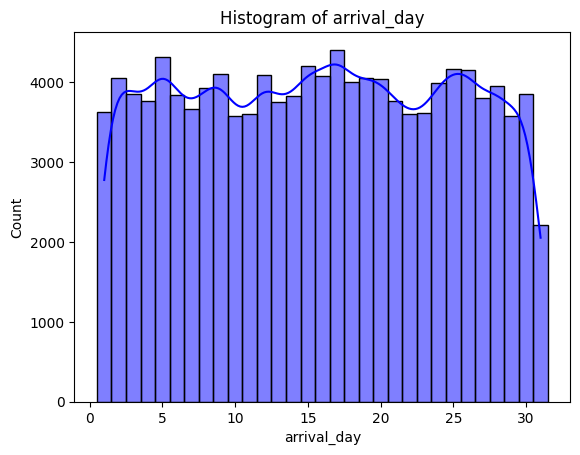

In [17]:
feature = "arrival_day"
#fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=df, x=feature, discrete=True, bins=31, color="blue", alpha=0.5, kde=True)
#ax.set_title(f"Histogram of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
#plt.tight_layout()
plt.title(f"Histogram of {feature}")
plt.show()

Insights:
- Looks good to me.
- Arrival on 31st day of month is around half of other days, as not all months of the year has 31st day.

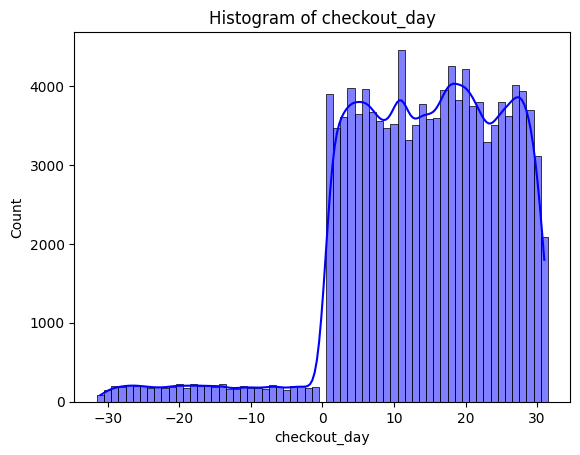

In [16]:
feature = "checkout_day"
#fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=df, x=feature, discrete=True, bins=31, color="blue", alpha=0.5, kde=True)
#ax.set_title(f"Histogram of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
#plt.tight_layout()
plt.title(f"Histogram of {feature}")
plt.show()

Insights: 
- Negative checkout_day, probably data entry error.

Preprocessing:
- Convert negative days to positive days.

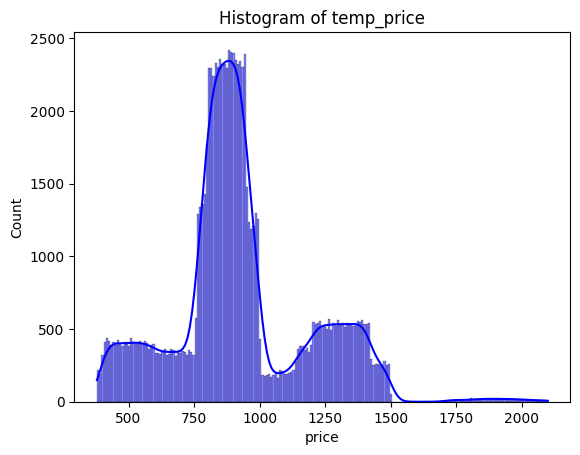

In [2]:
# Temperoray clean "price" for histogram plotting, currently incorrect type for price.
usd_mask = df["price"].str.lower().str.contains("usd", na=False)
#print(usd_price)
temp_price = df['price'].replace(r'[^\d.]', '', regex=True).astype(float)
# Convert those USD prices to SGD by multiplying by 1.3 (USD 1 = SGD 1.3)
temp_price[usd_mask] = temp_price[usd_mask] * 1.3
#print(temp_price)

feature = "temp_price"
#fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(temp_price, color="blue", alpha=0.5, kde=True)
#ax.set_title(f"Histogram of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
#plt.tight_layout()
plt.title(f"Histogram of {feature}")
plt.show()




Insights:
- multi-modal distribution, probably different peaks due to different room type pricing.
- right skewed, probably due to small number of premium room with high pricing, thus the small number of bookings.

Preprocessing:
- Convert USD to SGD (multiply by 1.3).
- Remove "USD" or "SGD" from the temp_price data columns, convert the column data type to float.
- Consider using log transform to compress the tail. (#np.log1p(temp_price)) 

### Distribution of features (Categorical)

In [ ]:
categorical_features = ["no_show", "branch", "booking_month", "arrival_month", "checkout_month", "country",
                        "first_time", "room", "num_adults", "num_children"]

In [ ]:
    """for col in categorical_cols:
        if col not in df.columns: 
            print(f"⚠️ Skipping missing column: {col}")
            continue
        plt.figure(figsize=(6,4))
        value_counts = df[col].value_counts().head(max_categories)
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f"Top {max_categories} categories in {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()"""

no_show
0.0    75166
1.0    44224
Name: count, dtype: int64


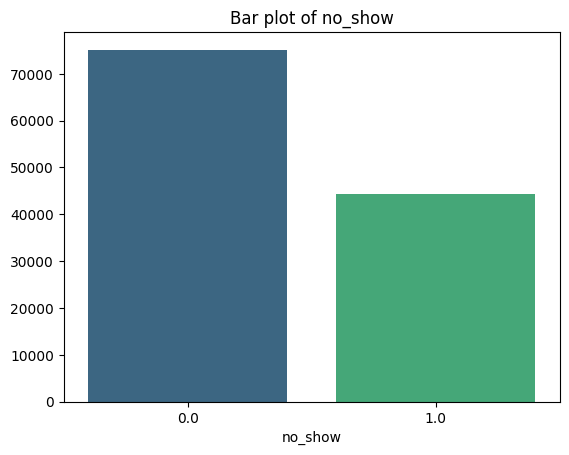

Baseline No-show rate: 37.0%


In [4]:
feature = "no_show"
value_counts = df[feature].value_counts()
print(value_counts)
#print(value_counts.index)
#print(value_counts.values)
#print(f"Total : {value_counts.values.sum()}")
#print(f"Nulls: {df['no_show'].isnull().sum()}")

#fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
#ax.set_title(f"Bar plot of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
#plt.tight_layout()
plt.title(f"Bar plot of {feature}")
plt.show()

#print(f"Total : {value_counts.values.sum()}") #75,166 + 44,224 = 119,390
#print(f"No-show ratio (1.0): {value_counts[1] / value_counts.values.sum()}") #44,224 / 119,390 = 0.371 (37.1%)
#print(f"Show-up ratio (0.0): {value_counts[0] / value_counts.values.sum()}")  #75,166 / 119,390 = 0.629 (62.9%)
#or
print(f"Baseline No-show rate: {df['no_show'].mean():.1%}")


Insights: 
- Data type is float, should be integer (0, 1).
- Baseline No-show rate: 37.0%.

Preprocessing:
- Convert float 0.0, 1.0 to integer 0, 1.

branch
Changi     79330
Orchard    40060
Name: count, dtype: int64


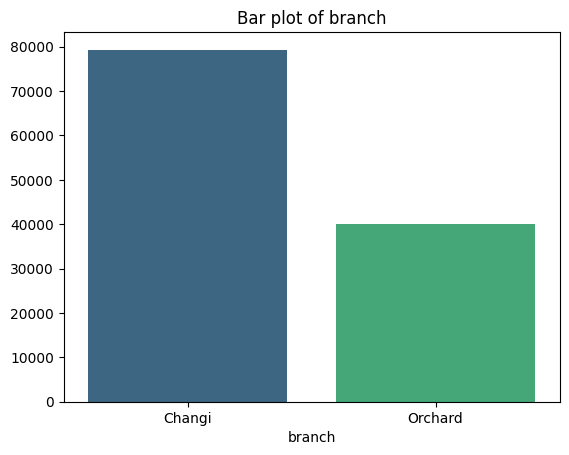

In [5]:
feature = "branch"
value_counts = df[feature].value_counts()
print(value_counts)
#print(f"Total : {value_counts.values.sum()}")

#fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
#ax.set_title(f"Bar plot of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
#plt.tight_layout()
plt.title(f"Bar plot of {feature}")
plt.show()

 #75,166 + 44,224 = 119,390
#print(f"Changi ratio: {value_counts["Changi"] / value_counts.values.sum()}") #44,224 / 119,390 = 0.371 (37.1%)
#print(f"Orchard ratio: {value_counts["Orchard"] / value_counts.values.sum()}")  #75,166 / 119,390 = 0.629 (62.9%)
#or
#print(f"Baseline No-show rate: {df[feature].mean():.1%}")"""

Insights: 
- Changi hotel is more popular.

Preprocessing:
- Convert to lowercase e.g "Changi" to "changi".

booking_month
June         10324
September    10315
November     10280
January      10214
August       10134
October      10068
July          9993
March         9754
February      9588
May           9588
April         9571
December      9561
Name: count, dtype: int64


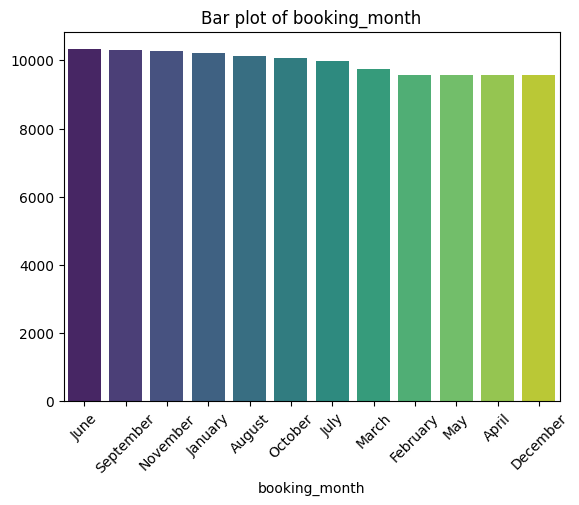

In [7]:
feature = "booking_month"
value_counts = df[feature].value_counts()
print(value_counts)
#print(f"Total : {value_counts.values.sum()}")

#fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
#ax.set_title(f"Bar plot of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
plt.xticks(rotation=45) #, ha='right')
#plt.tight_layout()
plt.title(f"Bar plot of {feature}")
plt.show()

#75,166 + 44,224 = 119,390
#print(f"Changi ratio: {value_counts["Changi"] / value_counts.values.sum()}") #44,224 / 119,390 = 0.371 (37.1%)
#print(f"Orchard ratio: {value_counts["Orchard"] / value_counts.values.sum()}")  #75,166 / 119,390 = 0.629 (62.9%)

Insights: ask
- Looks goof to me.
- No obvious seasonal trends.

Preprocessing:
- Convert to lowercase e.g "June" to "june".

arrival_month
August      13695
July        12515
May         11684
October     11009
April       10966
            ...  
FebruaRY        1
NovemBeR        1
NOvEmber        1
FEbruarY        1
FeBruaRy        1
Name: count, Length: 88, dtype: int64


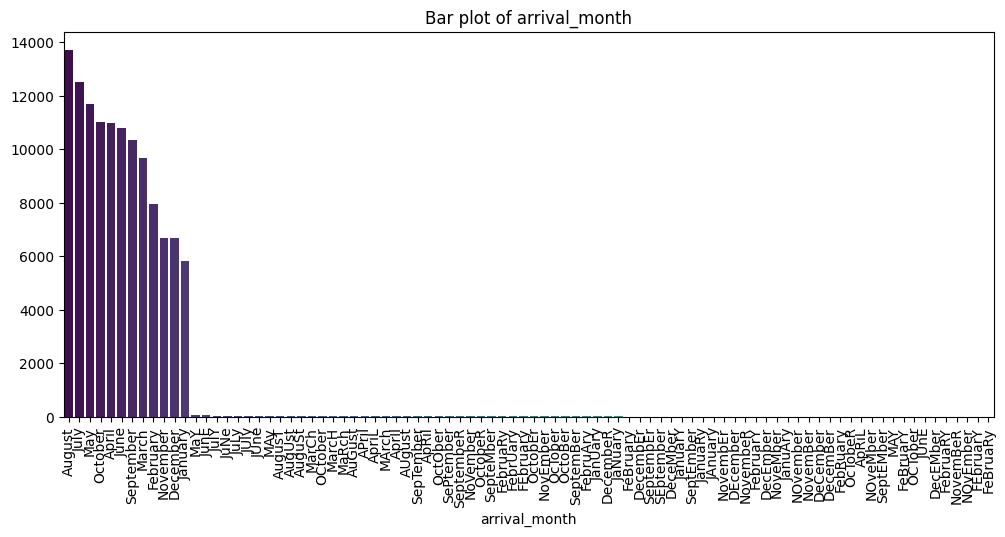

In [9]:
feature = "arrival_month"
value_counts = df[feature].value_counts()
print(value_counts)

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
ax.set_title(f"Bar plot of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
plt.xticks(rotation=90) #, ha='right')
#plt.tight_layout()
#plt.title(f"Bar plot of {feature}")
plt.show()

#print(f"Total : {value_counts.values.sum()}") #75,166 + 44,224 = 119,390
#print(f"Changi ratio: {value_counts["Changi"] / value_counts.values.sum()}") #44,224 / 119,390 = 0.371 (37.1%)
#print(f"Orchard ratio: {value_counts["Orchard"] / value_counts.values.sum()}")  #75,166 / 119,390 = 0.629 (62.9%)

Insights: 
- Column (arrival_month) contains case variations (e.g. "January" vs "january") thus, creating 88 unique values. 

Preprocessing:
- Applying lowercase transformation will normalize to 12 valid months.
- Convert column values to lowercase e.g "June" to "june" will normalize to 12 valid months.

country
China        48590
Indonesia    25812
India        15790
Australia    12129
Japan         9391
Singapore     3912
Malaysia      3766
Name: count, dtype: int64


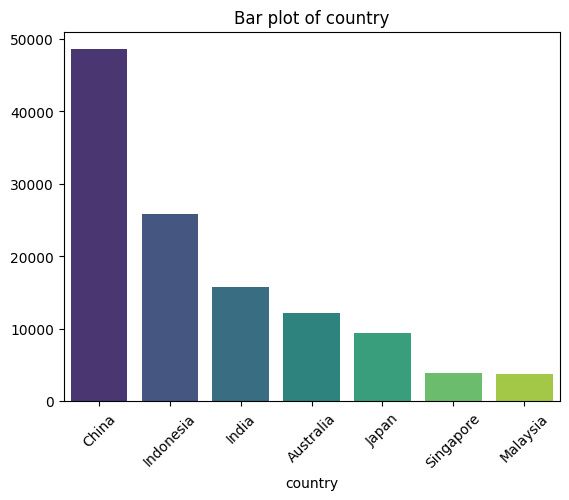

China ratio: 0.40698550967417707
Indonesia ratio: 0.21619901164251612


In [10]:
feature = "country"
value_counts = df[feature].value_counts()
print(value_counts)
#print(f"Total : {value_counts.values.sum()}")

#fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
#ax.set_title(f"Bar plot of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
plt.xticks(rotation=45) #, ha='right')
#plt.tight_layout()
plt.title(f"Bar plot of {feature}")
plt.show()

#china/total
#print(f"Total : {value_counts.values.sum()}") #75,166 + 44,224 = 119,390
print(f"China ratio: {value_counts["China"] / value_counts.values.sum()}") #44,224 / 119,390 = 0.371 (37.1%)
print(f"Indonesia ratio: {value_counts["Indonesia"] / value_counts.values.sum()}")
#print(f"Orchard ratio: {value_counts["Orchard"] / value_counts.values.sum()}")  #75,166 / 119,390 = 0.629 (62.9%)

Insights: 
- China customers made up 40% of the bookings.
- Indonesia customers made up 21% of the bookings.
- China and Indonesia dominate the bookings(61%) out of 7 countries.
- Consider combining Singapore and Malaysia arrivals as Others.

Preprocessing:
- Convert Singapore and Malaysia arrivals as Others.

first_time
Yes    115580
No       3810
Name: count, dtype: int64


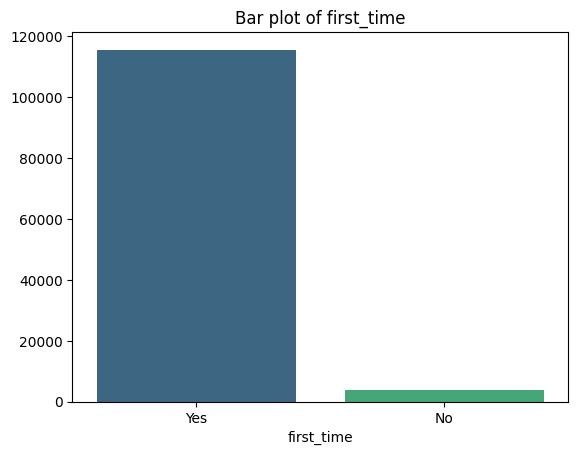

In [11]:
feature = "first_time"
value_counts = df[feature].value_counts()
print(value_counts)

#fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
#ax.set_title(f"Bar plot of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
#plt.xticks(rotation=45) #, ha='right')
#plt.tight_layout()
plt.title(f"Bar plot of {feature}")
plt.show()

#print(f"Total : {value_counts.values.sum()}") #75,166 + 44,224 = 119,390
#print(f"Changi ratio: {value_counts["Changi"] / value_counts.values.sum()}") #44,224 / 119,390 = 0.371 (37.1%)
#print(f"Orchard ratio: {value_counts["Orchard"] / value_counts.values.sum()}")  #75,166 / 119,390 = 0.629 (62.9%)

Insights: 
- Most are new customers, few return customers.

Preprocessing:
- Convert to integer64 type, "Yes" as 1 and "No" to 0.


room
king               91938
single             15697
queen              10824
president suite      931
Name: count, dtype: int64
Total : 119390


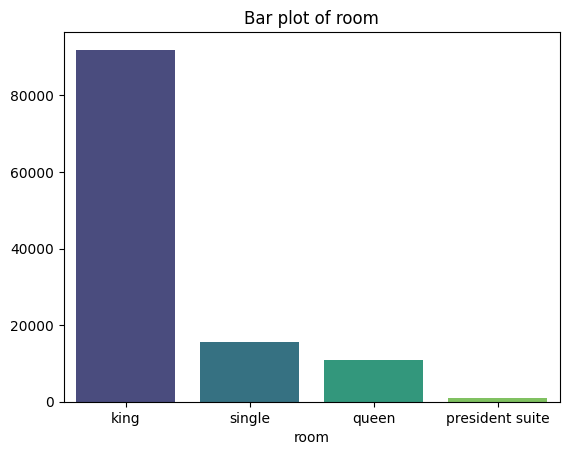

Empty DataFrame
Columns: [booking_id, no_show, branch, booking_month, arrival_month, arrival_day, checkout_month, checkout_day, country, first_time, room, price, platform, num_adults, num_children]
Index: []


In [13]:
feature = "room"
value_counts = df[feature].value_counts()
print(value_counts)
print(f"Total : {value_counts.values.sum()}")

#fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
#ax.set_title(f"Bar plot of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
#plt.xticks(rotation=45) #, ha='right')
#plt.tight_layout()
plt.title(f"Bar plot of {feature}")
plt.show()


print(df[df["room"].isna()])


Insights: 
- Missing many rooms type data, total rows is 119391, data above is only for 97778 bookings.

Preprocesing:
- Need to impute the room type according to similar price from other rows.

num_adults
1      62745
2      45243
one     6334
two     5068
Name: count, dtype: int64


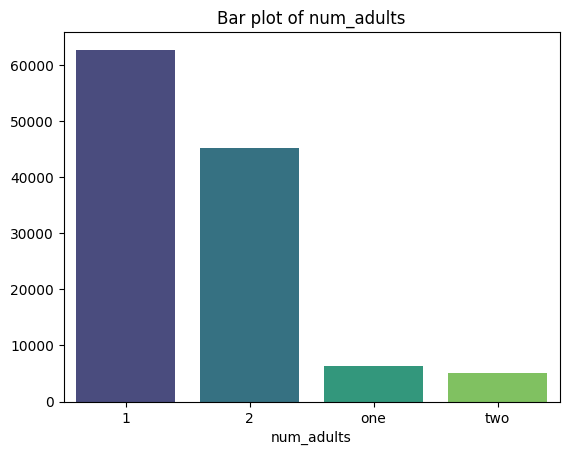

In [14]:
#"num_adults", "num_children"
feature = "num_adults"
value_counts = df[feature].value_counts()
print(value_counts)
#print(f"Total : {value_counts.values.sum()}")

#fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
#ax.set_title(f"Bar plot of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
#plt.xticks(rotation=45) #, ha='right')
#plt.tight_layout()
plt.title(f"Bar plot of {feature}")
plt.show()


#print(f"Changi ratio: {value_counts["Changi"] / value_counts.values.sum()}") #44,224 / 119,390 = 0.371 (37.1%)
#print(f"Orchard ratio: {value_counts["Orchard"] / value_counts.values.sum()}")  #75,166 / 119,390 = 0.629 (62.9%)

Insights: 
- Inconsistent data entry in 'num_adults' column - mixed numeric (1) and string ('one') values.

Preprocessing:
- convert those column values with "one" to 1, "two" to 2.
- convert the column to int64 type.


num_children
1.0    45556
0.0    44728
2.0    28858
3.0      248
Name: count, dtype: int64


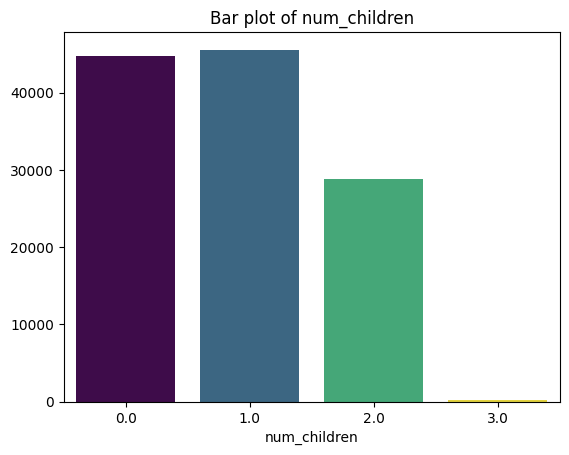

In [15]:
#"num_adults", "num_children"
feature = "num_children"
value_counts = df[feature].value_counts()
print(value_counts)
#print(f"Total : {value_counts.values.sum()}")

#fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
#ax.set_title(f"Bar plot of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
#plt.xticks(rotation=45) #, ha='right')
#plt.tight_layout()
plt.title(f"Bar plot of {feature}")
plt.show()

Insights: 
- num_children is in float data type.

Preprocessing:
- Convert to int64 data type.

platform
Website    54234
Email      32608
Agent      21735
Phone      10813
Name: count, dtype: int64


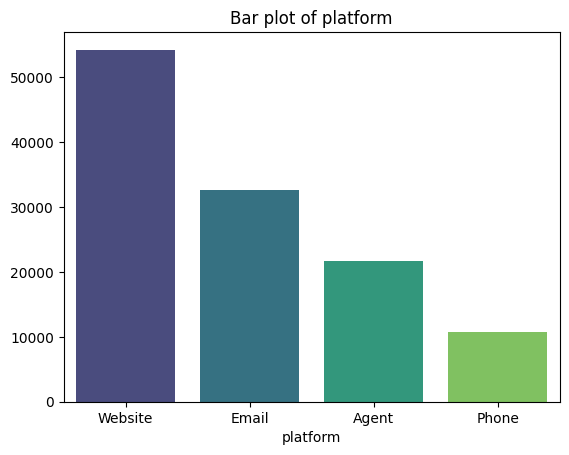

In [16]:
feature = "platform"
value_counts = df[feature].value_counts()
print(value_counts)
#print(f"Total : {value_counts.values.sum()}")

#fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
#ax.set_title(f"Bar plot of {feature}")
#ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
#plt.xticks(rotation=45) #, ha='right')
#plt.tight_layout()
plt.title(f"Bar plot of {feature}")
plt.show()

Insights:
- Majority of bookings is place through hotel web site.

## Preprocessing Data

In [ ]:
"""
categorical_features = ["no_show", "branch", "booking_month", "arrival_month", "checkout_month", "country",
                        "first_time", "room", "num_adults", "num_children", "platform"]
numerical_features = ["arrival_day", "checkout_day","price"]
"""

In [ ]:
"""- convert no_show to int64.
- convert arrival_day to int64.
- convert checkout_day to int64.
- convert first_time to int64.
- convert num_adults to int64.
- convert num_children to int64.
- convert price to float64.
- Standardize the currency to SGD, by converting all USD price to SGD by multipy by 1.3 (USD 1 = SGD 1.3).
- Standardize all string values in dataset to lowercases."""
"""
- Drop row with booking_id == 115536.
- Impute 21613 rows with room type according to nearest price.
- Impute 24882 rows with price = 0.
"""

In [2]:
def price_range_imputation(df):
    # Calculate price ranges for each room type from known data
    room_price_ranges = df[df['room'].notna()].groupby('room')['price'].agg(['min', 'max', 'mean', 'std']).reset_index()
    
    def assign_room_by_price(price):
        if pd.isna(price):
            return None
        
        # Find the room type whose price range contains this price
        for _, room_data in room_price_ranges.iterrows():
            room_min = room_data['min']
            room_max = room_data['max']
            room_std = room_data['std']
            
            # Check if price falls within reasonable range (mean ± 2std)
            room_mean = room_data['mean']
            lower_bound = room_mean - (2 * room_std)
            upper_bound = room_mean + (2 * room_std)
            
            if lower_bound <= price <= upper_bound:
                return room_data['room']
        
        # If no exact match, find closest mean price
        room_price_ranges['distance'] = abs(room_price_ranges['mean'] - price)
        closest_room = room_price_ranges.loc[room_price_ranges['distance'].idxmin(), 'room']
        return closest_room
    
    # Apply imputation
    missing_mask = df['room'].isna()
    df.loc[missing_mask, 'room'] = df.loc[missing_mask, 'price'].apply(assign_room_by_price)
    
    return df

#df = price_range_imputation(df)

In [3]:
df = df[df["booking_id"] != 115536]  #remove the all empty row
df["branch"] = df["branch"].str.lower()
df["booking_month"] = df["booking_month"].str.lower()
df["arrival_month"] = df["arrival_month"].str.lower()
df["checkout_month"] = df["checkout_month"].str.lower()
df["country"] = df["country"].str.lower()
df["first_time"] = df["first_time"].str.lower()
df["num_adults"] = df["num_adults"].str.lower()
df["platform"] = df["platform"].str.lower()
df["room"] = df["room"].str.lower()
df["price"] = df["price"].str.lower()

df["no_show"] = df["no_show"].astype(int)
df["arrival_day"] = df["arrival_day"].astype(int)

df["num_children"] = df["num_children"].astype(int)

#df["checkout_day"] = pd.to_numeric(df["checkout_day"], errors='coerce')
df["checkout_day"] = df["checkout_day"].astype(int)
df["checkout_day"] = df["checkout_day"].apply(lambda x: (x * -1) if x < 0 else x)

df["num_adults"] = df["num_adults"].apply(lambda x: 1 if x == "one" else (2 if x == "two" else x))
#df["num_adults"] = df["num_adults"].map({"one": 1, "two": 2})
df["num_adults"] = df["num_adults"].astype(int)

df["first_time"] = df["first_time"].apply(lambda x: 1 if x == "yes" else 0)
#df["first_time"] = df["first_time"].replace({"yes": 1, "no": 0})
#df["first_time"] = df["first_time"].map({"yes": 1, "no": 0})
df["first_time"] = df["first_time"].astype(int)

df['price'] = df['price'].fillna(0)
usd_mask = df["price"].str.contains("usd", na=False)
temp_price = df['price'].replace(r'[^\d.]', '', regex=True).astype(float)
temp_price = pd.to_numeric(temp_price, errors='coerce')
temp_price[usd_mask] = temp_price[usd_mask] * 1.3     #(USD 1 = SGD 1.3)
df["price"] = temp_price

#impute those 0 "price" according to nearest room
# Calculate average prices by room type from available data
room_avg_prices = df[df['price'] != 0].groupby('room')['price'].agg(['mean', 'median', 'std', 'count']).round(2)
print("Room type price statistics:")
print(room_avg_prices)

# Impute using room-type medians (robust to outliers)
room_median_prices = df[df['price'] != 0].groupby('room')['price'].median()

def impute_by_room(row):
    #if pd.isna(row['price']) and row['room'] in room_median_prices:
    if (row['price'] == 0) and row['room'] in room_median_prices:       
        return room_median_prices[row['room']]
    return row['price']

df['price'] = df.apply(impute_by_room, axis=1)


#impute empty room type
df = price_range_imputation(df)

# custom convert months to int
# then convert int months to cyclinical encoding.

print(df)


Room type price statistics:
                    mean   median     std  count
room                                            
king              995.68   912.46  206.98  52578
president suite  1887.72  1900.28  139.49    552
queen             895.40   935.17  184.46   8041
single            581.06   548.26  137.99  11726
        booking_id  no_show   branch booking_month arrival_month  arrival_day  \
0            94113        0   changi      november          june           25   
1            86543        0  orchard        august      november           28   
2            75928        0   changi         march      february            7   
3            66947        1  orchard     september       october            1   
4           106390        0  orchard         march          june           20   
...            ...      ...      ...           ...           ...          ...   
119386        4823        0   changi     september         april            3   
119387       25062        0  o

In [4]:
#verify correct data types and nulls
display(df.info())
#display(df.dtypes)
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   booking_id      119390 non-null  int64  
 1   no_show         119390 non-null  int64  
 2   branch          119390 non-null  object 
 3   booking_month   119390 non-null  object 
 4   arrival_month   119390 non-null  object 
 5   arrival_day     119390 non-null  int64  
 6   checkout_month  119390 non-null  object 
 7   checkout_day    119390 non-null  int64  
 8   country         119390 non-null  object 
 9   first_time      119390 non-null  int64  
 10  room            119390 non-null  object 
 11  price           119390 non-null  float64
 12  platform        119390 non-null  object 
 13  num_adults      119390 non-null  int64  
 14  num_children    119390 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 14.6+ MB


None

booking_id        0
no_show           0
branch            0
booking_month     0
arrival_month     0
arrival_day       0
checkout_month    0
checkout_day      0
country           0
first_time        0
room              0
price             0
platform          0
num_adults        0
num_children      0
dtype: int64

In [10]:
# no_show - convert from float to int, one missing value.
feature = "no_show"
print(df[df["no_show"].isnull()])
print(f"{feature} data type (before): {df[feature].dtype}")
df[feature] = df[feature].astype(int)
print(f"{feature} data type (after): {df[feature].dtype}")


#branch - Convert column values to lowercase e.g "Changi" to "changi".

Empty DataFrame
Columns: [booking_id, no_show, branch, booking_month, arrival_month, arrival_day, checkout_month, checkout_day, country, first_time, room, price, platform, num_adults, num_children]
Index: []
no_show data type (before): int64
no_show data type (after): int64


## Feature Engineering
- Add feature num_days_stayed, has_children


In [4]:
#df["has_children"] = df.apply(lambda x: 1 if x["num_children"] > 0 else 0)
print(df["num_children"].unique())
df["has_children"] = df["num_children"].map({0:0, 1:1, 2:1, 3:1}) #apply(lambda x: 1 if x["num_children"] > 0 else 0)
#print(df["has_children"])

print(df[df["checkout_day"] < 1])
print(df["checkout_day"].unique())

# Complete month mapping dictionary
month_to_num = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6,
    'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12
}
# Convert month strings to numbers
#df['arrival_month_num'] = df['arrival_month'].map(month_to_num)
#df['checkout_month_num'] = df['checkout_month'].map(month_to_num)

# Verify conversion
#print(df[['arrival_month', 'arrival_month_num', 'checkout_month', 'checkout_month_num']].head())

# Create year columns (assuming same year for simplicity)
df['arrival_year'] = 2024  # Adjust based on your data context
df['checkout_year'] = 2024

# Most robust method - no format strings needed
df['arrival_date'] = pd.to_datetime({
    'year': 2024,
    'month': df['arrival_month'].str.lower().map(month_to_num),
    'day': df['arrival_day']
}, errors='coerce')

df['checkout_date'] = pd.to_datetime({
    'year': 2024,
    'month': df['checkout_month'].str.lower().map(month_to_num), 
    'day': df['checkout_day']
}, errors='coerce')

# Check for invalid dates
#print(f"Invalid arrival dates: {df['arrival_date'].isna().sum()}")
#print(f"Invalid checkout dates: {df['checkout_date'].isna().sum()}")

# Show the problematic rows
#invalid_arrival = df[df['arrival_date'].isna()]
#invalid_checkout = df[df['checkout_date'].isna()]

#print("Problematic arrival dates:")
#print(invalid_arrival[['arrival_month', 'arrival_day']].value_counts())

#print("Problematic checkout dates:")
#print(invalid_checkout[['checkout_month', 'checkout_day']].value_counts())


# Calculate days stayed
df['days_stayed'] = (df['checkout_date'] - df['arrival_date']).dt.days

df['days_stayed'] = df['days_stayed'].apply(lambda x: 366 + x if x < 0 else x)
print(df[df['days_stayed'] < 0])

# Display results
print(df[['arrival_date', 'checkout_date', 'days_stayed']].head())

[0 2 1 3]
Empty DataFrame
Columns: [booking_id, no_show, branch, booking_month, arrival_month, arrival_day, checkout_month, checkout_day, country, first_time, room, price, platform, num_adults, num_children, has_children]
Index: []
[27 29 11  3 24 13 16 19 28 10 12 15 23 31 25 17  8  2  9  7  1 20 14  4
  6 21  5 18 22 30 26]
Empty DataFrame
Columns: [booking_id, no_show, branch, booking_month, arrival_month, arrival_day, checkout_month, checkout_day, country, first_time, room, price, platform, num_adults, num_children, has_children, arrival_year, checkout_year, arrival_date, checkout_date, days_stayed]
Index: []

[0 rows x 21 columns]
  arrival_date checkout_date  days_stayed
0   2024-06-25    2024-06-27            2
1   2024-11-28    2024-11-29            1
2   2024-02-07    2024-02-11            4
3   2024-10-01    2024-10-03            2
4   2024-06-20    2024-06-24            4


## Bivariate Analysis

### Categorical vs Target

In [ ]:
#Your Variable Types	Best Graphs to Plot
"""
Numerical vs. Numerical	
1. Scatter Plot
2. Line Plot (for time series)
3. Heatmap (for correlation)

Categorical vs. Numerical	
1. Box Plot (Box-and-Whisker)
2. Violin Plot
3. Bar Plot (with means)
4. Histogram / Density Plot (facetted)

Categorical vs. Categorical	
1. Stacked Bar Plot
2. Grouped Bar Plot
3. Mosaic Plot
4. Heatmap (with counts)
"""


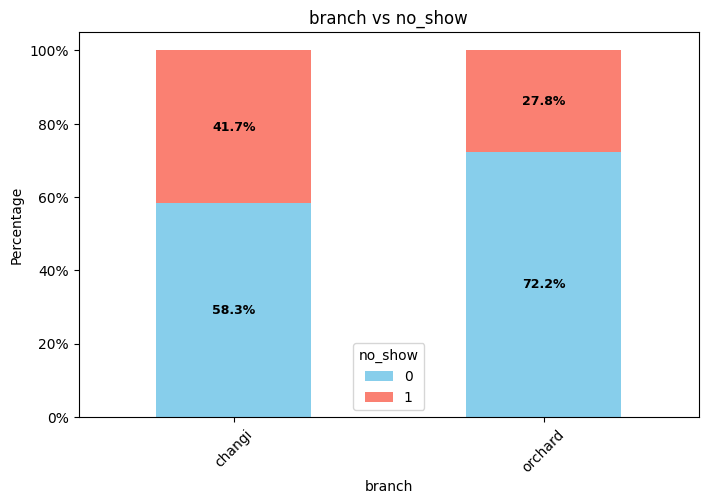

p value: 0.0000


In [31]:
#Study relationships between each feature and the target variable (e.g., no_show).
categorical_features = ["no_show", "branch", "booking_month", "arrival_month", "checkout_month", "country",
                        "first_time", "room", "num_adults", "num_children", "platform"]
target = "no_show"
feature = "branch"
fig, ax = plt.subplots(figsize=(8, 5))
#sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='viridis',legend=False)
#sns.countplot(x=feature, hue="no_show", data=df)
cross = pd.crosstab(df[feature], df[target], normalize="index")
#cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"])
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
#ax.set_ylabel("Frequency")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45) #, ha='right')
#plt.legend()
#plt.tight_layout()
#plt.title(f"{feature} vs {target}")
plt.show()

contingency = pd.crosstab(df["branch"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- Changi branch got higher percentage of no_show customers.
- branch location clearly affects no-show behavior.
- chi-square test, p < 0.05, branch and no_show are significantly dependent.

branch is predictive of no_show because the class distribution differs significantly across branches.

You should include it as an important categorical feature in your model.
The model can then learn:

Higher branch_changi → higher chance of no_show

Model impact

Because this is a categorical variable with few distinct values (2 branches):

Works well with tree-based models (Decision Tree, Random Forest, XGBoost) — they handle categorical splits easily.

Works fine with Logistic Regression after one-hot encoding.

Not ideal for models sensitive to high cardinality features (not a problem here since only 2 categories).

import scipy.stats as stats
contingency = pd.crosstab(df["branch"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

#from scipy.stats import chi2_contingency
#contingency = pd.crosstab(df["branch"], df["no_show"])
#chi2, p, dof, expected = chi2_contingency(contingency)
print(p)

    If p < 0.05, → branch and no_show are significantly dependent.

Interpreting the p-value
p-value Range	Interpretation	Meaning
p < 0.05	✅ Statistically Significant	Strong evidence that branch and no-show are related
p < 0.01	✅ Highly Significant	Very strong evidence of relationship
p < 0.001	✅ Very Highly Significant	Extremely strong evidence
p ≥ 0.05	❌ Not Significant	No strong evidence of relationship

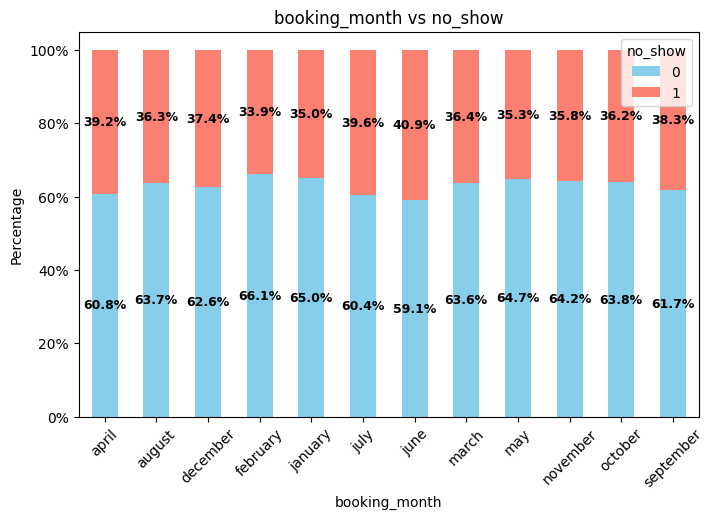

p value: 0.0000


In [30]:
target = "no_show"
feature = "booking_month"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.show()

contingency = pd.crosstab(df["booking_month"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- No show range from 33.9% to 40.9%,
- May have seasonal effects, bookings done in june and july have higher no show rate.
- chi-square test, p < 0.05, booking_month and no_show are significantly dependent.
- Consider cyclical encoding for months.

In [ ]:
cyclical encoding (using sin and cos) is better for features like month or day of week.
    

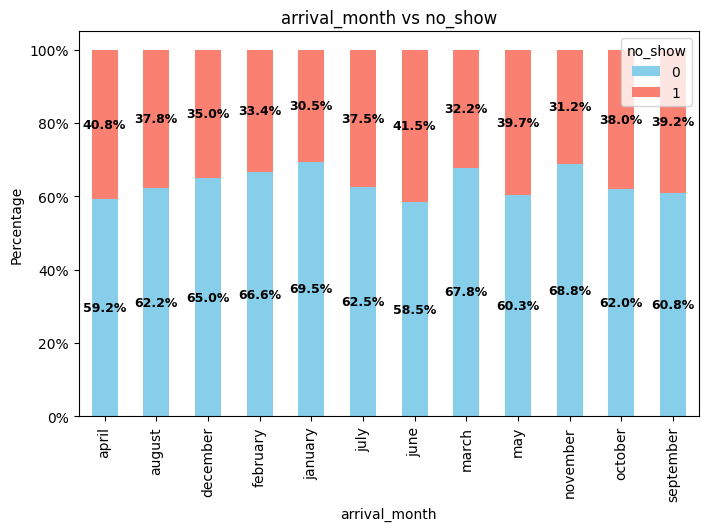

p value: 0.0000


In [29]:
target = "no_show"
#feature = "arrival_month"
#df["arrival_month_temp"] = df["arrival_month"].str.lower()

feature = "arrival_month"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=90) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.show()

contingency = pd.crosstab(df["arrival_month"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- chi-square test, p < 0.05, arrival_month and no_show are significantly dependent.
- Consider cyclical encoding for months.

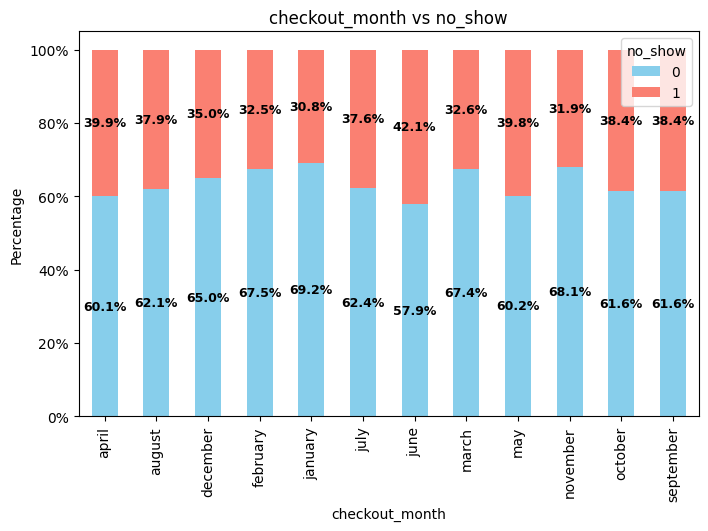

p value: 0.0000


In [28]:
#checkout_month
target = "no_show"
feature = "checkout_month"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=90) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.show()

contingency = pd.crosstab(df["checkout_month"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- chi-square test, p < 0.05, checkout_month and no_show are significantly dependent.
- Consider cyclical encoding for months.

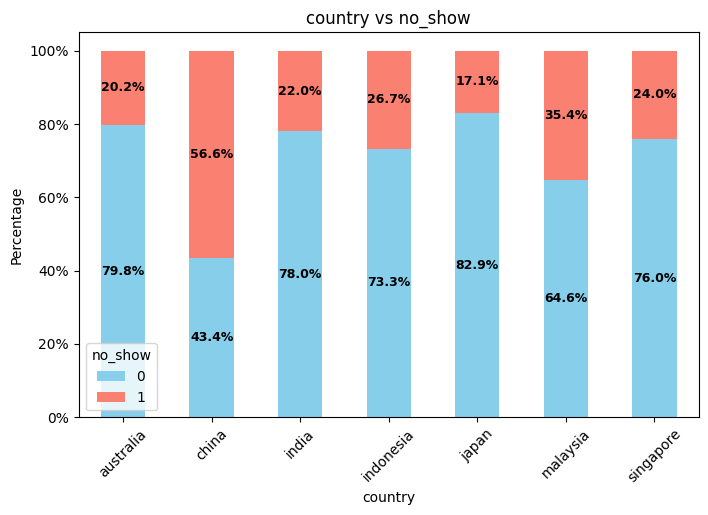

p value: 0.0000


In [27]:
target = "no_show"
feature = "country"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.show()

contingency = pd.crosstab(df["country"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights: 
- China customers no_show more than half of their bookings (56.6%), which is much higher than other countries.
- chi-square test, p < 0.05, country and no_show are significantly dependent.

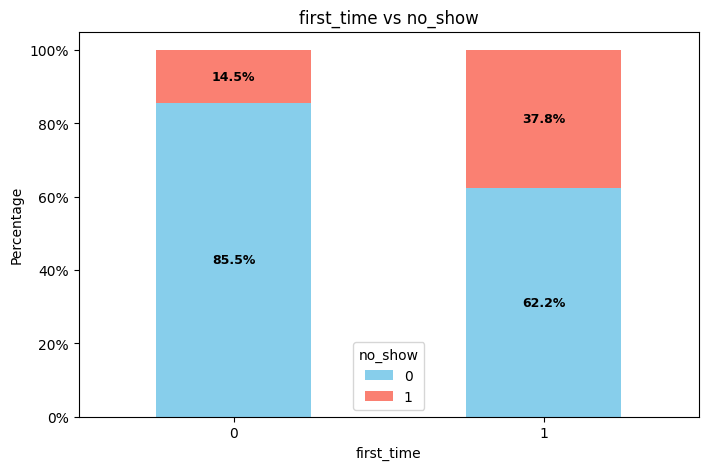

p value: 0.0000


In [26]:
target = "no_show"
feature = "first_time"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=0) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.show()

contingency = pd.crosstab(df["first_time"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- first_time booking customers has greater no_show percentage.
- chi-square test, p < 0.05, first_time and no_show are significantly dependent.

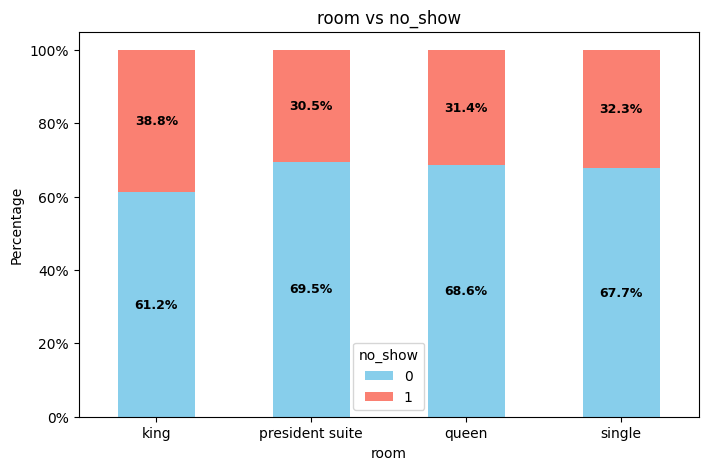

p value: 0.0000


In [25]:
target = "no_show"
feature = "room"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=0) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.show()

contingency = pd.crosstab(df["room"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- room type king has the most no_show.
- chi-square test, p < 0.05, room and no_show are significantly dependent.

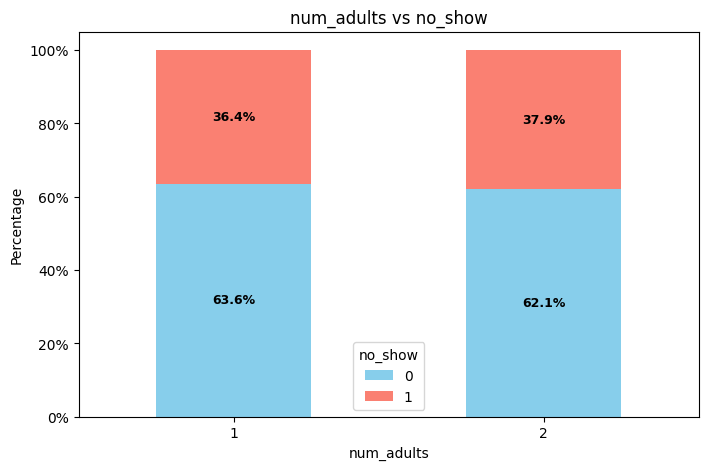

p value: 0.0000


In [24]:
#num_adults", "num_children"]
target = "no_show"
#df["num_adults_temp"] = df["num_adults"].replace({"one": 1, "two": 2})
#mapping = {"one": 1, "two": 2}  # add more as needed
#df["num_adults_temp"] = df["num_adults"].map(mapping)
#df["num_adults_temp"] = df["num_adults"].apply(lambda x: 1 if x == "one" else 2 if x == "two" else x)
#df["num_adults_temp"] = df["num_adults_temp"].astype(int)
#df["num_adults_temp"] = pd.to_numeric(df["num_adults_temp"], errors='coerce')
#df["num_adults_temp"] = df["num_adults"].apply(lambda x: 2 if x == "two" else x)

feature = "num_adults"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=0) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.show()

contingency = pd.crosstab(df["num_adults"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- Almost similar no_show rate between 1 or 2 adults.
- chi-square test, p < 0.05, num_adults and no_show are significantly dependent.

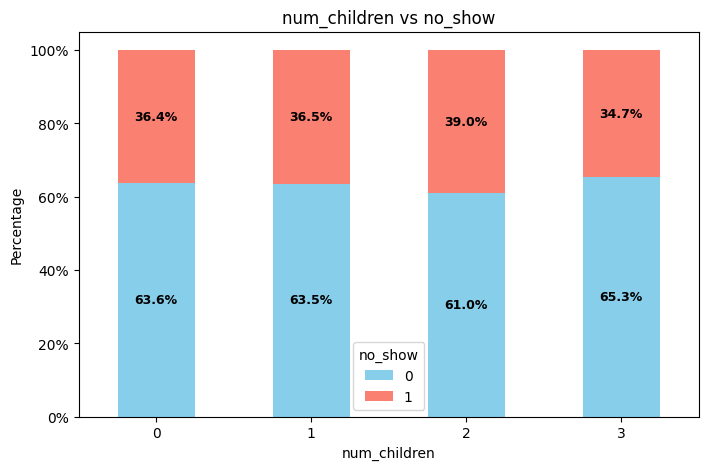

p value: 0.0000


In [23]:
#num_adults", "num_children"]
target = "no_show"


feature = "num_children"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=0) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.show()

contingency = pd.crosstab(df["num_children"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- Slightly higher no_show for num_children 2.
- chi-square test, p < 0.05, num_children and no_show are significantly dependent.

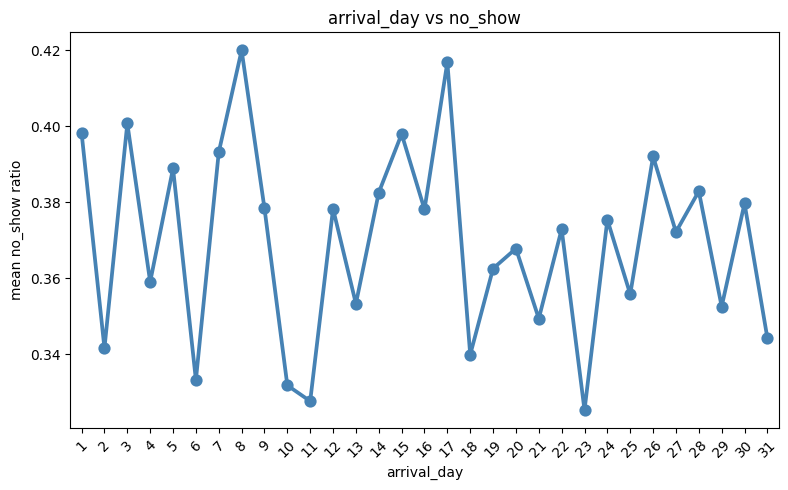

p value: 0.0000


In [22]:
#numerical_features = ["arrival_day", "checkout_day","price"]

target = "no_show"
feature = "arrival_day"
fig, ax = plt.subplots(figsize=(8, 5))
#sns.boxplot(x=target, y=feature, data=df, hue=target, palette="pastel", legend=False)
#sns.countplot(x=feature, hue=target, data=df, palette="pastel")
sns.pointplot(x=feature, y=target, data=df, estimator="mean", color="steelblue", errorbar=None)
#color="steelblue",


# Format y-axis as percentages
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_ylabel(f"mean no_show ratio")
ax.set_xlabel(f"{feature}")
plt.xticks(rotation=45) #, ha='right')
#plt.legend()
plt.tight_layout()
plt.show()


contingency = pd.crosstab(df["arrival_day"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- chi-square test, p < 0.05, arrival_day and no_show are significantly dependent.
- Consider cyclical encoding for arrival_day.

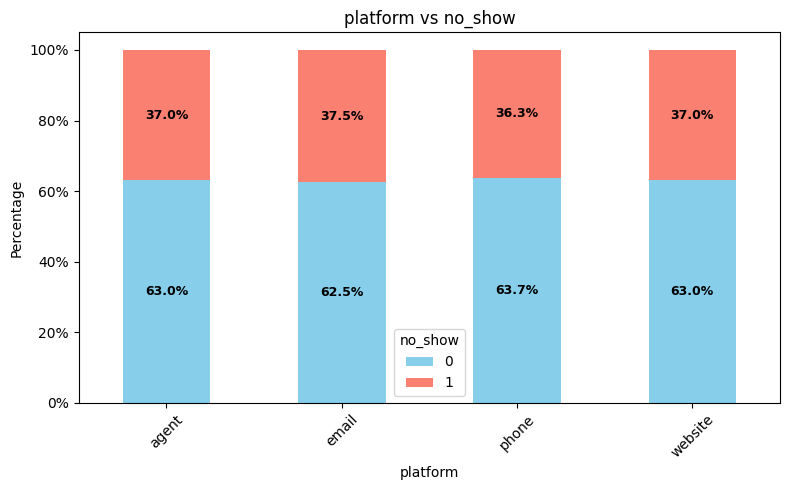

p value: 0.145886140803151


In [4]:
#num_adults", "num_children"]
target = "no_show"


feature = "platform"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45) #, ha='right')
#plt.legend()
plt.tight_layout()
plt.show()

#import scipy.stats as stats
#contingency = pd.crosstab(df["platform"], df["no_show"])
#chi2, p, dof, expected = stats.chi2_contingency(contingency)
#print(f"Chi-square p-value: {p}")
#If p < 0.05, there’s a significant relationship between booking platform and no-shows — confirming what you visually see.
#from sklearn.feature_selection import chi2, SelectKBest
#selector = SelectKBest(chi2, k=10)
#X_new = selector.fit_transform(X_categorical, y)
# If multiple features are highly related to each other:
# - Redundant information
# - Model instability
# - Overfitting risk

# Check Variance Inflation Factor (VIF)
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#Variance Inflation Factor (VIF) is a measure used to detect multicollinearity

contingency = pd.crosstab(df["platform"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p}")

Insights:
- Roughly same no_show for platform bookings.
- chi-square test, p >= 0.05, not Significant, no strong evidence of relationship.

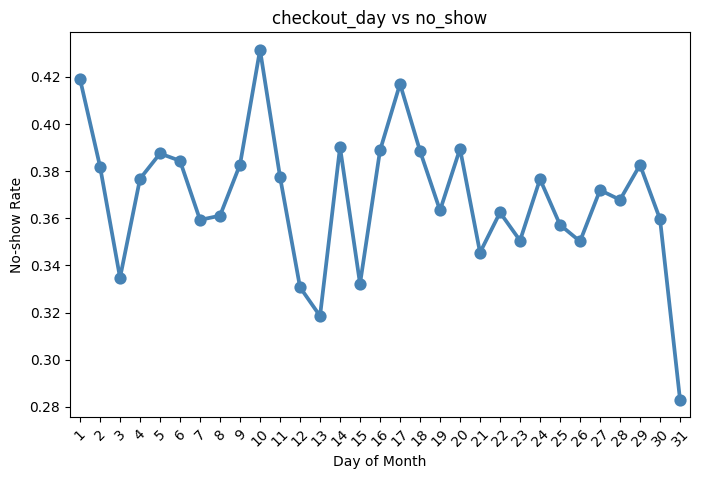

p value: 0.0000


In [21]:
target = "no_show"
feature = "checkout_day"
#df["checkout_day_temp"] = df[feature].apply(lambda x: (x * -1) if x < 0 else x)
#df["checkout_day_temp"] = pd.to_numeric(df["checkout_day_temp"], errors='coerce')
#feature = "checkout_day_temp"

fig, ax = plt.subplots(figsize=(8, 5))
#sns.boxplot(x=target, y=feature, data=df, hue=target, palette="pastel", legend=False)
#sns.countplot(x=feature, hue=target, data=df, palette="pastel")
#sns.pointplot(x=feature, y=target, data=df, estimator="mean", color="steelblue")
sns.pointplot(x=feature, y=target, data=df, estimator="mean", color="steelblue", errorbar=None)


# Format y-axis as percentages
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
#ax.set_ylabel(f"frequency")
#ax.set_xlabel(f"{feature}")
ax.set_ylabel("No-show Rate")
ax.set_xlabel("Day of Month")
plt.xticks(rotation=45) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.show()

#t-test
#group0 = df.loc[df["no_show"] == 0, "checkout_day"]
#group1 = df.loc[df["no_show"] == 1, "checkout_day"]
#t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)
#print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
#p < 0.05 → significant difference between the groups
#p ≥ 0.05 → no significant difference

contingency = pd.crosstab(df["checkout_day"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p:.4f}")

Insights:
- chi-square test, p < 0.05, checkout_day and no_show are significantly dependent.

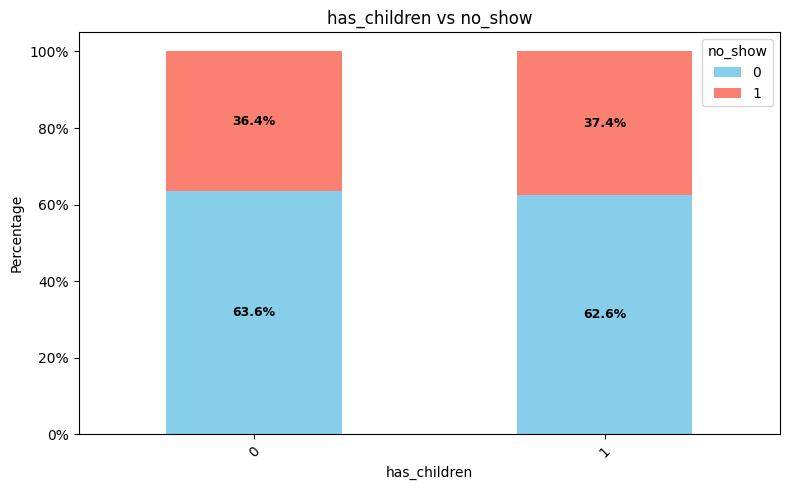

p value: 0.0001716014946478499


In [7]:
target = "no_show"


feature = "has_children"
fig, ax = plt.subplots(figsize=(8, 5))
cross = pd.crosstab(df[feature], df[target], normalize="index")
cross.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], ax=ax, legend=True)

# Add percentage labels on each segment
for i, (index, row) in enumerate(cross.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        height = value
        if height > 0:  # Only add label if segment has visible height
            # Calculate position
            x = i
            y = cumulative_height + height / 2
            percentage = f'{height * 100:.1f}%'
            
            # Add text annotation
            ax.annotate(percentage, 
                       (x, y), 
                       ha='center', 
                       va='center',
                       fontweight='bold',
                       color='black',
                       fontsize=9)
        
        cumulative_height += height

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
ax.set_title(f"{feature} vs {target}")
ax.set_xlabel(f"{feature}")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45) #, ha='right')
#plt.legend()
plt.tight_layout()
plt.show()

#import scipy.stats as stats
#contingency = pd.crosstab(df["platform"], df["no_show"])
#chi2, p, dof, expected = stats.chi2_contingency(contingency)
#print(f"Chi-square p-value: {p}")
#If p < 0.05, there’s a significant relationship between booking platform and no-shows — confirming what you visually see.
#from sklearn.feature_selection import chi2, SelectKBest
#selector = SelectKBest(chi2, k=10)
#X_new = selector.fit_transform(X_categorical, y)
# If multiple features are highly related to each other:
# - Redundant information
# - Model instability
# - Overfitting risk

# Check Variance Inflation Factor (VIF)
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#Variance Inflation Factor (VIF) is a measure used to detect multicollinearity

contingency = pd.crosstab(df["has_children"], df["no_show"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"p value: {p}")

Insights:
- chi-square test, p < 0.05, has_children and no_show are significantly dependent.

Empty DataFrame
Columns: [booking_id, no_show, branch, booking_month, arrival_month, arrival_day, checkout_month, checkout_day, country, first_time, room, price, platform, num_adults, num_children, has_children, arrival_year, checkout_year, arrival_date, checkout_date, days_stayed]
Index: []

[0 rows x 21 columns]


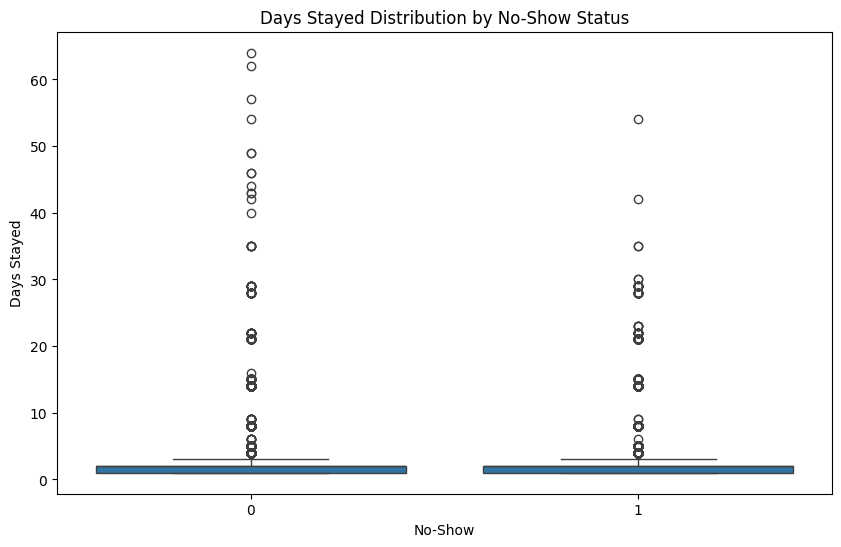

0.000000


'\n# Separate the numeric variable by target groups\ngroup_0 = df[df[\'no_show\'] == 0][\'days_stayed\']\ngroup_1 = df[df[\'no_show\'] == 1][\'days_stayed\']\n# Perform t-test\nt_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)  # Welch\'s t-test\n\nprint(f"T-statistic: {t_stat:.4f}")\nprint(f"P-value: {p_value:.4f}")'

In [20]:
print(df[df["days_stayed"] < 1])

plt.figure(figsize=(10, 6))
sns.boxplot(x='no_show', y='days_stayed', data=df)
#sns.stripplot(x='no_show', y='days_stayed', data=df, 
#              color='black', alpha=0.3, size=2, jitter=True)
plt.title('Days Stayed Distribution by No-Show Status')
plt.xlabel('No-Show')
plt.ylabel('Days Stayed')
plt.show()

result = stats.ttest_ind(
    df.loc[df["no_show"] == 0, "days_stayed"],
    df.loc[df["no_show"] == 1, "days_stayed"],
    equal_var=False
)

#print(result.statistic)
print(f"{result.pvalue:4f}")
#print(result.df)

"""
# Separate the numeric variable by target groups
group_0 = df[df['no_show'] == 0]['days_stayed']
group_1 = df[df['no_show'] == 1]['days_stayed']
# Perform t-test
t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")"""

- t test, p < 0.05, days_stayed and no_show are significantly dependent.

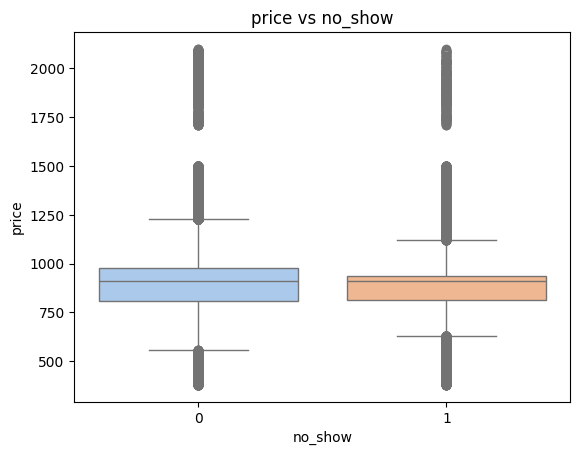

IQR (Interquartile Range) for price by no_show:
no_show
0    168.18
1    122.10
Name: price, dtype: float64


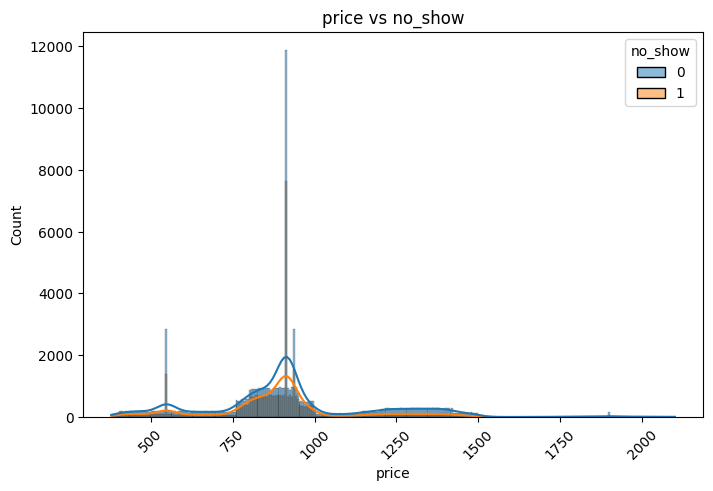

16.677696877253737
0.0000
103230.59483778542


In [32]:
target = "no_show"
#feature = "price"
#usd_mask = df["price"].str.lower().str.contains("usd", na=False)
#print(usd_price)
#temp_price = df['price'].replace(r'[^\d.]', '', regex=True).astype(float)
# Convert those USD prices to SGD by multiplying by 1.3 (USD 1 = SGD 1.3)
#temp_price = pd.to_numeric(temp_price, errors='coerce')
#temp_price[usd_mask] = temp_price[usd_mask] * 1.3
#print(temp_price)

#df["temp_price"] = temp_price
feature = "price"
#fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x=target, y=feature, data=df, hue=target, palette="pastel", legend=False)
#sns.countplot(x=feature, hue=target, data=df, palette="pastel")



# Format y-axis as percentages
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
#ax.set_title(f"{feature} vs {target}")
#ax.set_ylabel(f"{feature}")
#ax.set_xlabel(f"{feature}")
plt.xticks(rotation=0) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.title(f"{feature} vs {target}")
plt.show()

# Calculate IQR for temp_price grouped by no_show
iqr_values = df.groupby("no_show")["price"].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

print("IQR (Interquartile Range) for price by no_show:")
print(iqr_values)

#What is the Interquartile Range (IQR)?
#The IQR measures how spread out the middle 50% of your data is.
#It’s a measure of variability that’s less affected by outliers than the full range.


fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(x=feature, hue=target, data=df, color="blue", alpha=0.5, kde=True)
#sns.boxplot(x=target, y=feature, data=df, hue=target, palette="pastel", legend=False)
#sns.countplot(x=feature, hue=target, data=df, palette="pastel")

# Format y-axis as percentages
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    
#ax.set_title(f"{feature} vs {target}")
#ax.set_ylabel(f"{feature}")
#ax.set_xlabel(f"{feature}")
plt.xticks(rotation=45) #, ha='right')
#plt.legend()
#plt.tight_layout()
plt.title(f"{feature} vs {target}")
plt.show()

result = stats.ttest_ind(
    df.loc[df["no_show"] == 0, "price"],
    df.loc[df["no_show"] == 1, "price"],
    equal_var=False
)

print(result.statistic)
print(f"{result.pvalue:.4f}")
print(result.df)


Insights:
- People who showed up (0.0) had a wider price range (more variation).
- People who did not show (1.0) had a narrower price range, i.e., their booking prices were more consistent.
- Both groups have many high-price outliers (above 1500–2000).
- t test, p < 0.05, price and no_show are significantly dependent.

## Multivariate Analysis

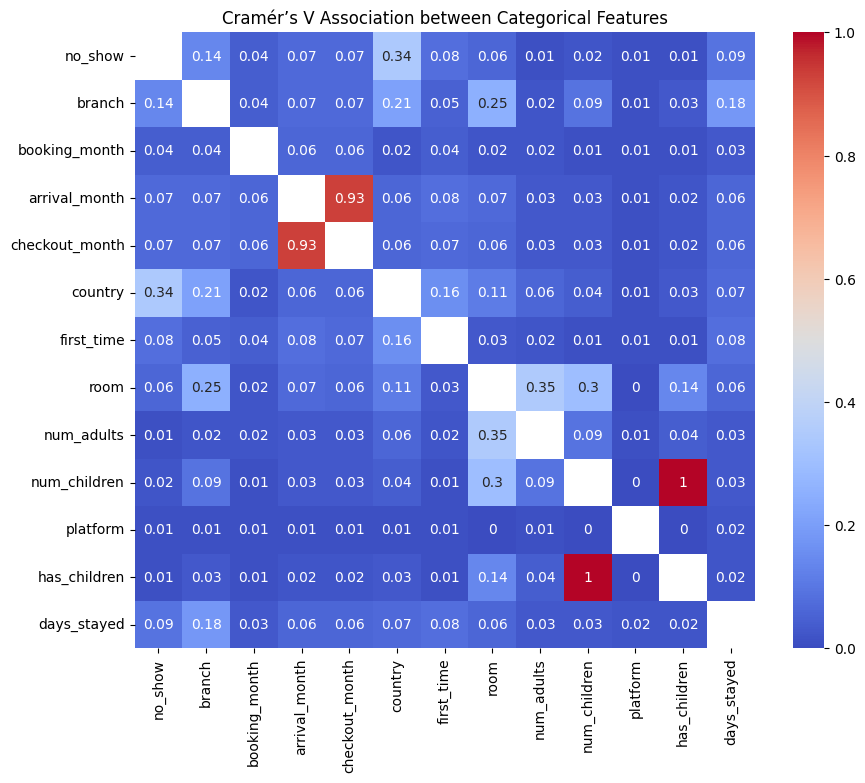

In [7]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2/n) / (min(k-1, r-1)))

categorical_features = ["no_show", "branch", "booking_month", "arrival_month",
                        "checkout_month", "country", "first_time", "room",
                        "num_adults", "num_children", "platform", "has_children", "days_stayed"]

cramer_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 != col2:
            cramer_matrix.loc[col1, col2] = round(cramers_v(df[col1], df[col2]), 2)
        else:
            cramer_matrix.loc[col1, col2] = np.nan

plt.figure(figsize=(10,8))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap="coolwarm")
plt.title("Cramér’s V Association between Categorical Features")
plt.show()

Insights:
-

In [12]:
print(cramers_v(df["country"], df["branch"]))

0.20970546117135802


In [10]:
# Example: show top correlated pairs
cramer_matrix_unstacked = (
    cramer_matrix.astype(float)
    .unstack()
    .dropna()
    .sort_values(ascending=False)
)
cramer_matrix_unstacked.head(15)

num_children    has_children      1.00
has_children    num_children      1.00
checkout_month  arrival_month     0.93
arrival_month   checkout_month    0.93
num_adults      room              0.35
room            num_adults        0.35
no_show         country           0.34
country         no_show           0.34
num_children    room              0.30
room            num_children      0.30
                branch            0.25
branch          room              0.25
                country           0.21
country         branch            0.21
days_stayed     branch            0.18
dtype: float64

In [11]:
target = "no_show"

target_assoc = {
    col: cramers_v(df[col], df[target]) 
    for col in categorical_features if col != target
}
pd.Series(target_assoc).sort_values(ascending=False)

country           0.343250
branch            0.136513
days_stayed       0.086799
first_time        0.084744
arrival_month     0.070220
checkout_month    0.068969
room              0.062862
booking_month     0.041496
num_children      0.022798
num_adults        0.014489
has_children      0.010875
platform          0.006714
dtype: float64

In [ ]:
important_features = ["country", "branch", "first_time", "days_stayed"]



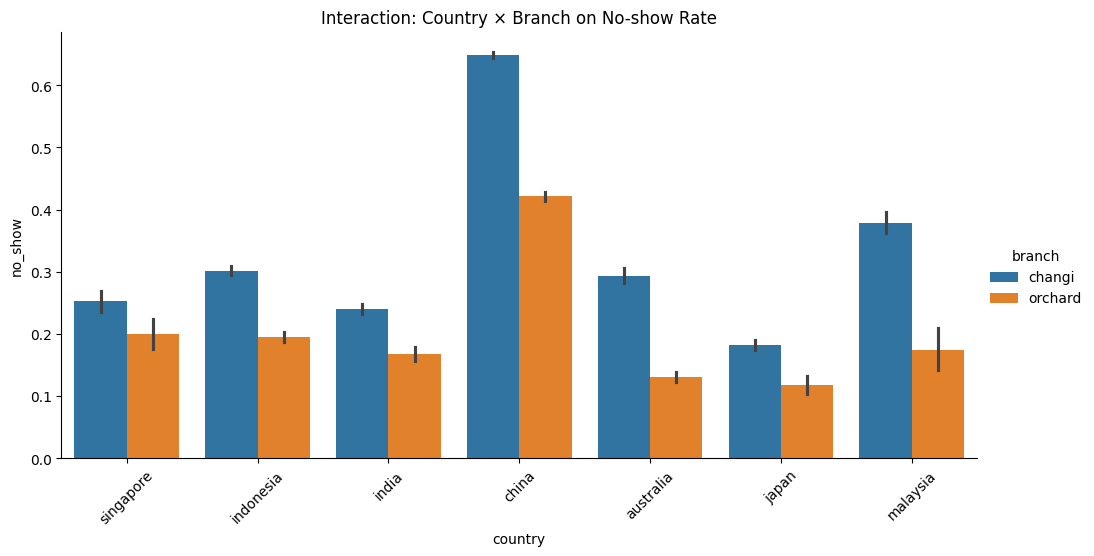

In [13]:
sns.catplot(
    x="country", y="no_show", hue="branch",
    kind="bar", data=df, height=5, aspect=2
)
plt.title("Interaction: Country × Branch on No-show Rate")

plt.xticks(rotation=45)
plt.show()

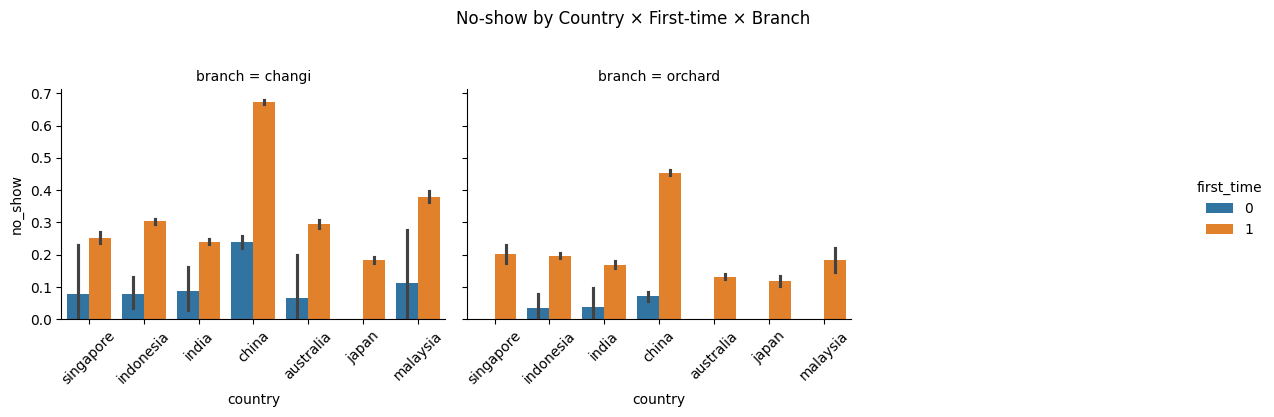

In [22]:
"""sns.catplot(
    x="country", y="no_show", hue="first_time",
    col="branch", kind="bar", data=df, col_wrap=3, height=4
)
plt.xticks(rotation=45)
plt.suptitle("No-show by Country × First-time × Branch", y=1.03)
plt.show()"""

g = sns.catplot(
    x="country", y="no_show", hue="first_time",
    col="branch", kind="bar", data=df, col_wrap=3, height=4
)

# Rotate x-ticks for ALL subplots
#for ax in g.axes.flat:#
#   ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# This applies to all subplots
g.set_xticklabels(rotation=45)

plt.suptitle("No-show by Country × First-time × Branch", y=1.03)
plt.tight_layout()
plt.show()

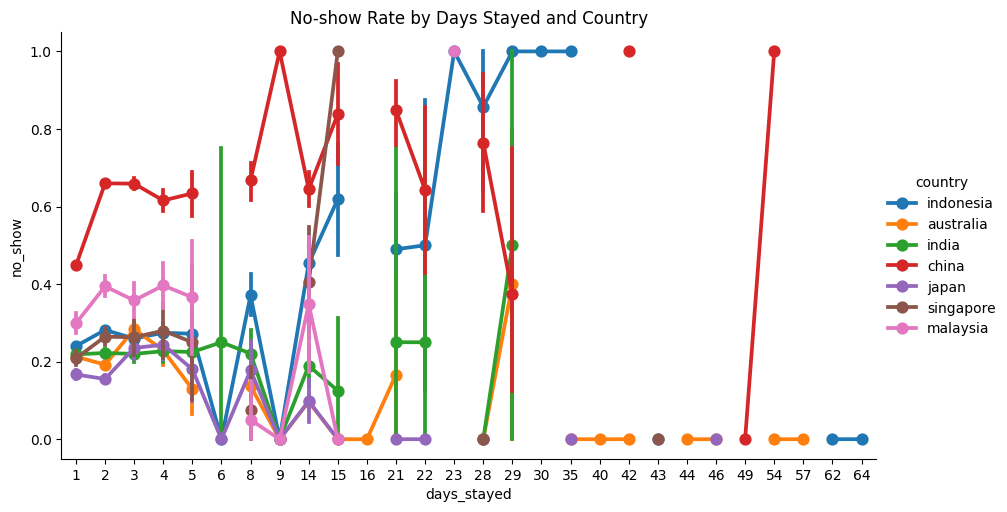

In [23]:
sns.catplot(
    x="days_stayed", y="no_show", hue="country",
    kind="point", data=df, height=5, aspect=1.8
)
plt.title("No-show Rate by Days Stayed and Country")
plt.show()

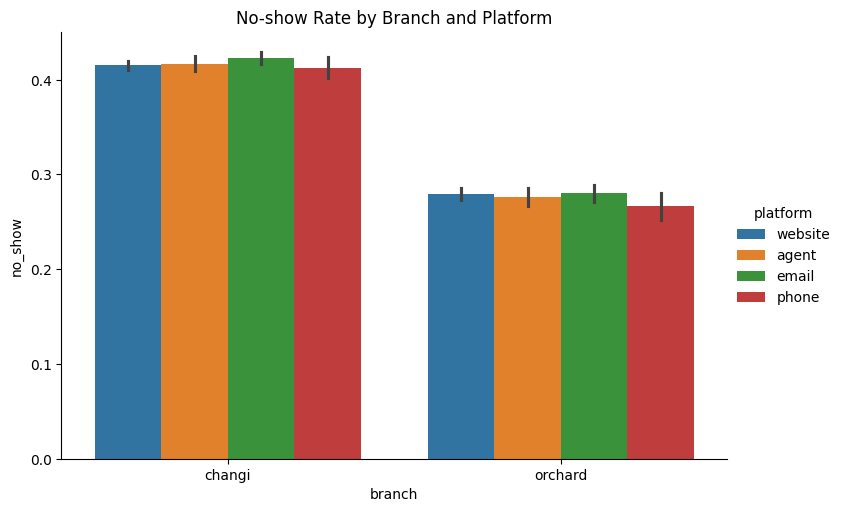

In [8]:
sns.catplot(
    x="branch", y="no_show", hue="platform",
    kind="bar", data=df, height=5, aspect=1.5
)
plt.title("No-show Rate by Branch and Platform")
plt.show()

<Figure size 1200x800 with 0 Axes>

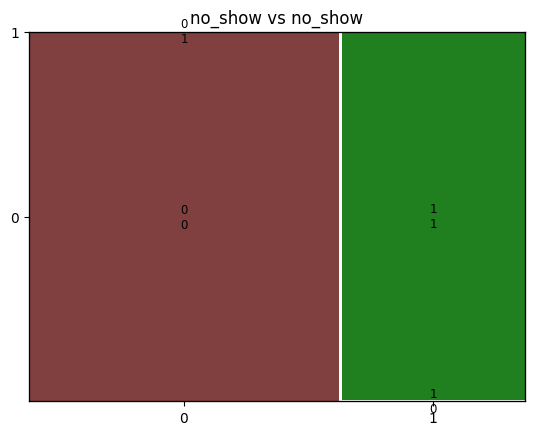

<Figure size 1200x800 with 0 Axes>

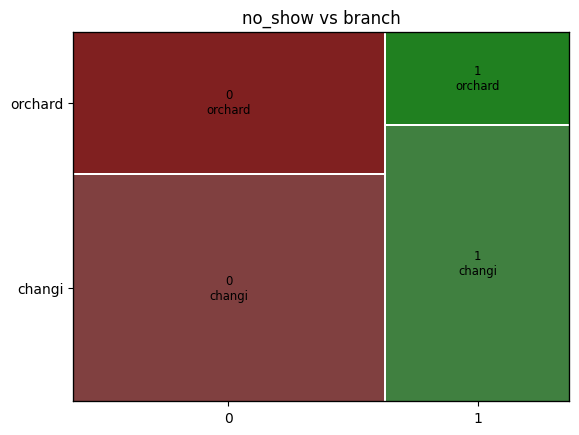

<Figure size 1200x800 with 0 Axes>

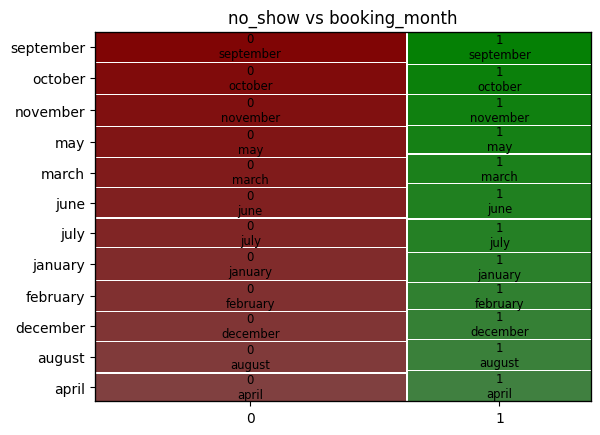

<Figure size 1200x800 with 0 Axes>

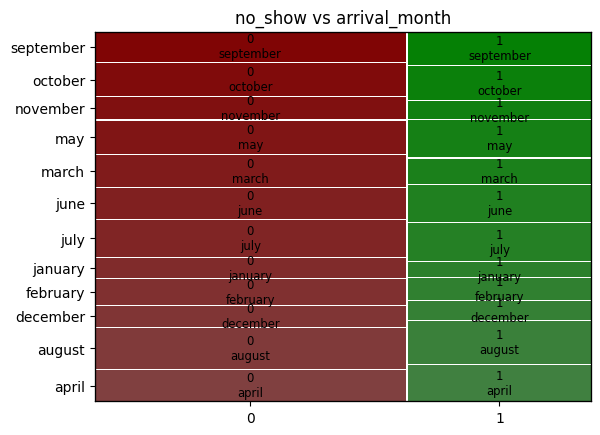

<Figure size 1200x800 with 0 Axes>

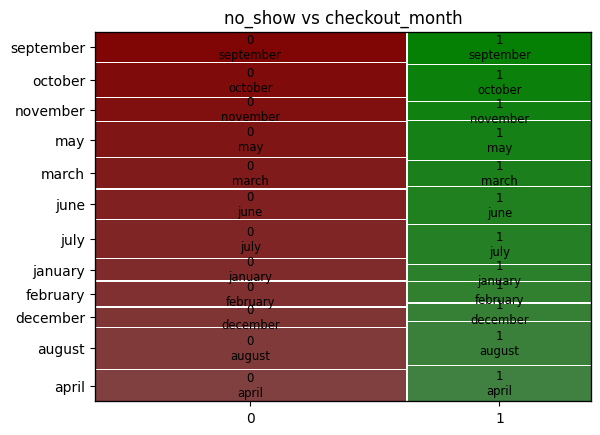

In [6]:
from statsmodels.graphics.mosaicplot import mosaic
import itertools

categorical_features = ["no_show", "branch", "booking_month", "arrival_month", "checkout_month", "country",
                        "first_time", "room", "num_adults", "num_children", "platform"]

# Create mosaic plots for combinations
def create_mosaic_plots(df, target, features, max_combinations=5):
    for i, feature in enumerate(features[:max_combinations]):
        plt.figure(figsize=(12, 8))
        mosaic_data = pd.crosstab(df[target], df[feature])
        mosaic(mosaic_data.stack(), title=f'{target} vs {feature}')
        plt.show()

create_mosaic_plots(df, "no_show", categorical_features)

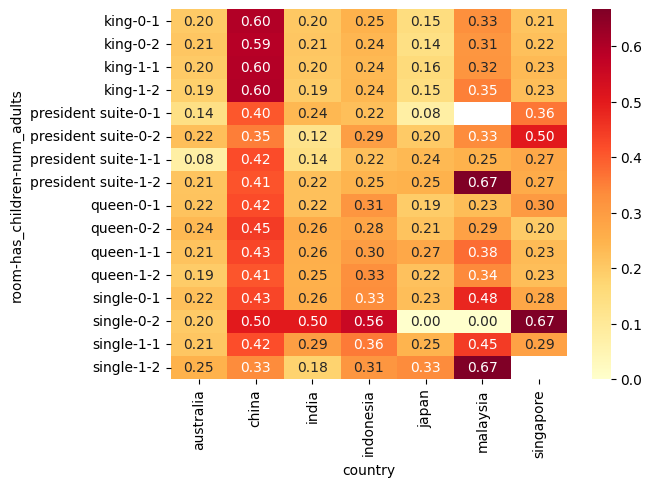

In [8]:
# Cross-tabulation heatmap
"""cross_tab = pd.crosstab(df['room'], df['has_children'], df['country'], df["no_show"])
sns.heatmap(cross_tab, annot=True, fmt='d')
plt.show()"""

# Using pivot_table for more control
pivot_tab = df.pivot_table(
    index=['room', 'has_children', 'num_adults'],
    columns='country',
    values='no_show',
    aggfunc='mean'
)
sns.heatmap(pivot_tab, annot=True, fmt='.2f', cmap='YlOrRd')
plt.show()



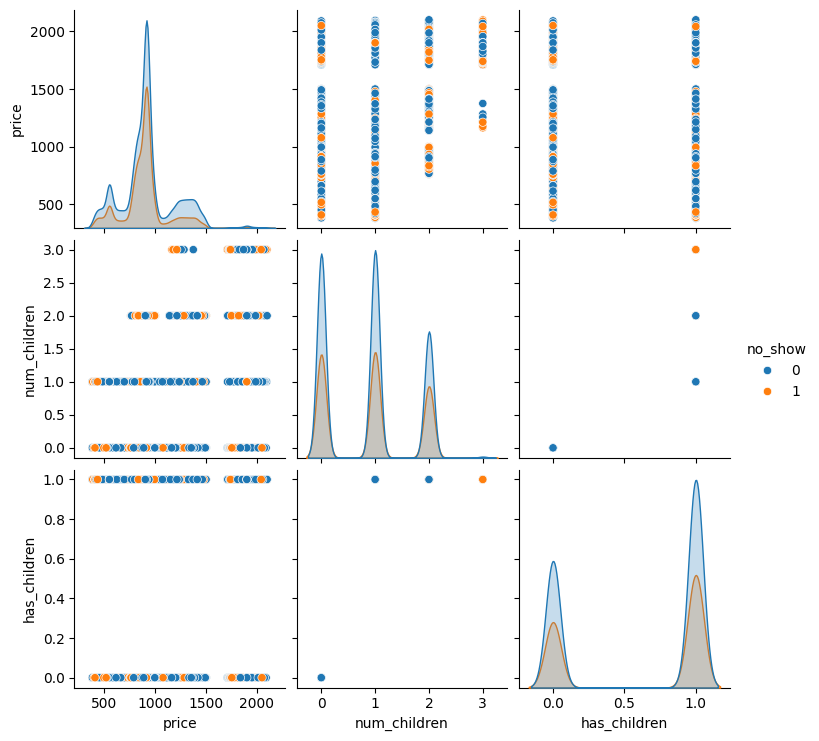

In [35]:
# Correlation heatmap (numeric only)
#corr = df.corr(numeric_only=True)
#sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
#plt.title("Feature Correlation Heatmap")
#plt.show()

# Pairplot of important features
sns.pairplot(df[['price', 'num_children', "has_children", "country", "room",'no_show']], hue='no_show')
plt.show()


In [ ]:
# If you have a target variable (like no_show encoded as 0/1)
corr_with_target = numeric_df.corr()['no_show'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_with_target.to_frame(), 
            annot=True, 
            cmap='RdYlBu', 
            center=0)
plt.title('Correlation with Target Variable (no_show)')
plt.show()

In [17]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,booking_id,int64,0,119391,119391,"{94113: 1, 86543: 1, 75928: 1, 66947: 1, 10639..."
1,no_show,float64,1,119390,2,"{0.0: 75166, 1.0: 44224}"
2,branch,object,1,119390,2,"{'Changi': 79330, 'Orchard': 40060}"
3,booking_month,object,1,119390,12,"{'June': 10324, 'September': 10315, 'November'..."
4,arrival_month,object,1,119390,88,"{'August': 13695, 'July': 12515, 'May': 11684,..."
5,arrival_day,float64,1,119390,31,"{17.0: 4406, 5.0: 4317, 15.0: 4196, 25.0: 4160..."
6,checkout_month,object,1,119390,12,"{'August': 13836, 'July': 12760, 'May': 12044,..."
7,checkout_day,float64,1,119390,62,"{11.0: 4458, 18.0: 4248, 20.0: 4207, 27.0: 400..."
8,country,object,1,119390,7,"{'China': 48590, 'Indonesia': 25812, 'India': ..."
9,first_time,object,1,119390,2,"{'Yes': 115580, 'No': 3810}"


📊 Numeric columns: ['booking_id', 'no_show', 'arrival_day', 'checkout_day', 'first_time', 'price', 'num_adults', 'num_children']
🏷️ Categorical columns: ['branch', 'booking_month', 'arrival_month', 'checkout_month', 'country', 'room', 'platform']



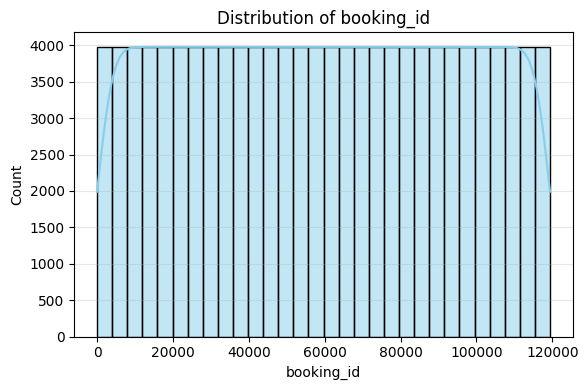

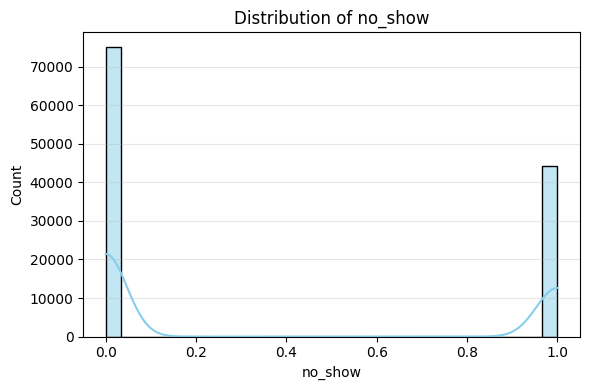

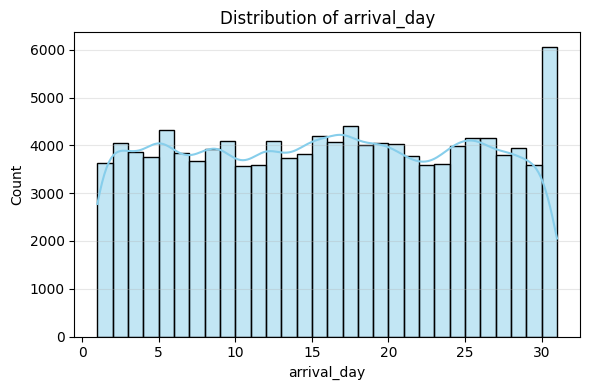

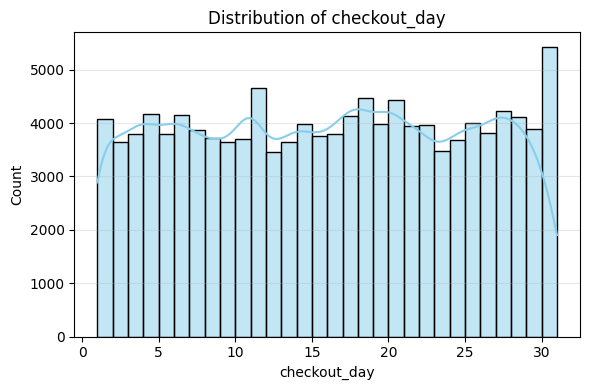

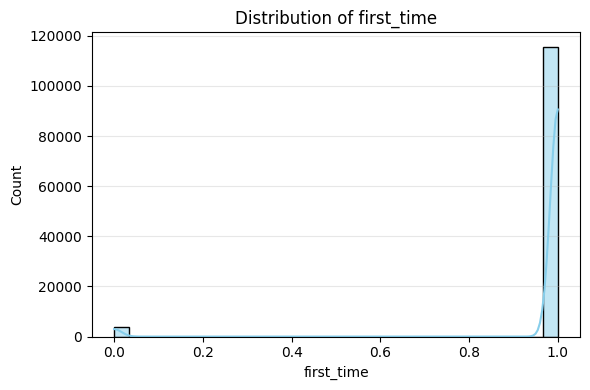

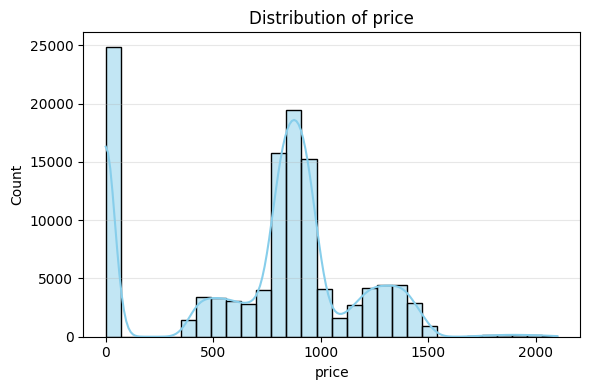

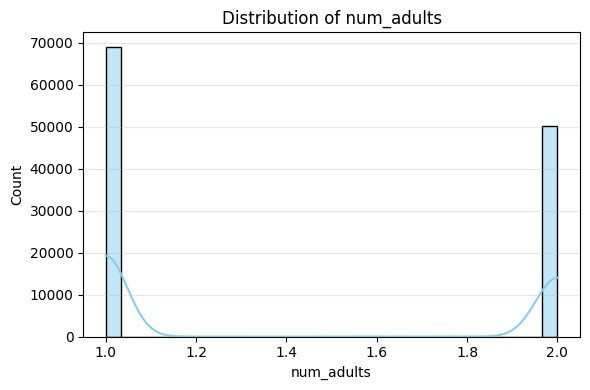

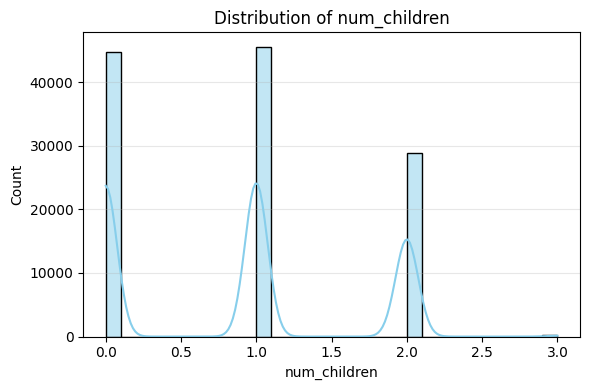

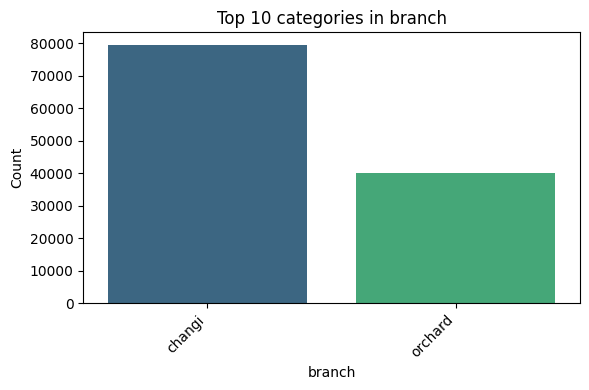

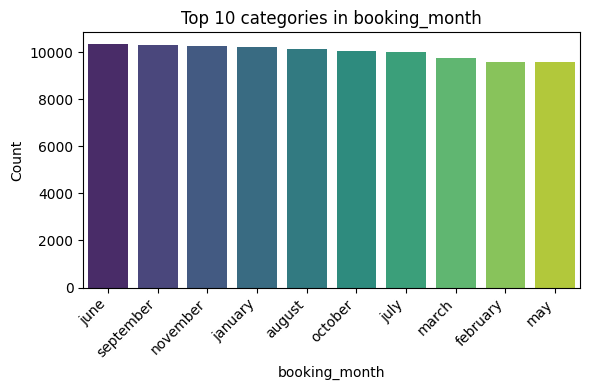

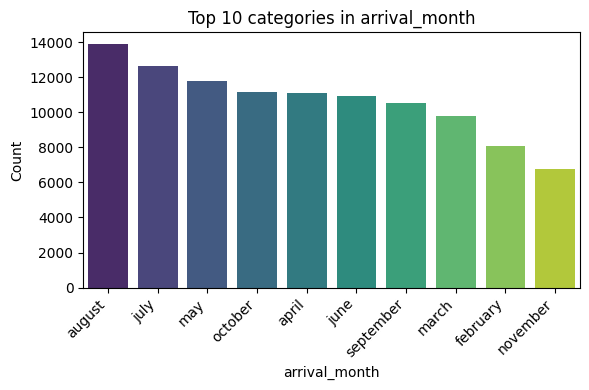

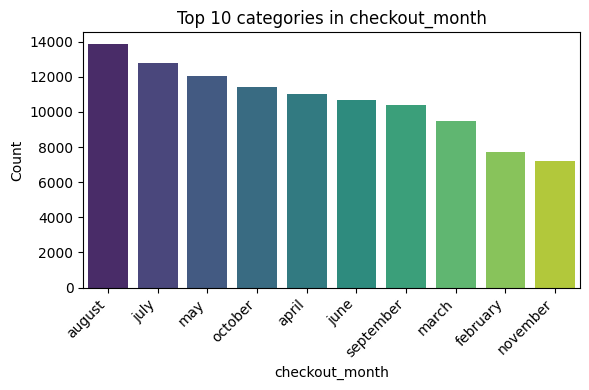

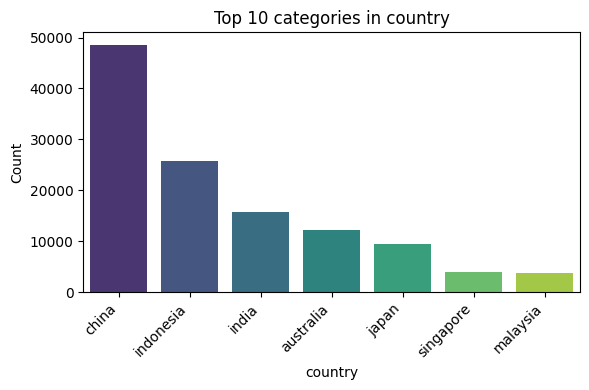

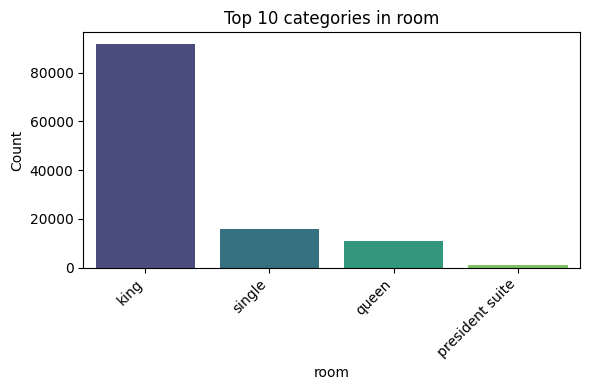

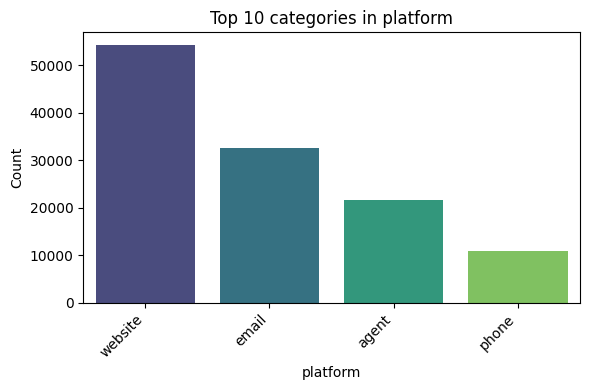

In [12]:
# --- AUTO VISUALIZATION FUNCTION ---

def plot_feature_distributions(df, max_categories=10):
    """
    Plot histograms for numeric columns and bar charts for categorical columns.

    Parameters:
        df (pd.DataFrame): your dataset
        max_categories (int): limit for top categories shown in bar plots
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(exclude=['number']).columns

    print(f"📊 Numeric columns: {list(numeric_cols)}")
    print(f"🏷️ Categorical columns: {list(categorical_cols)}\n")

    # --- Plot histograms for numeric columns ---
    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    # --- Plot bar charts for categorical columns ---
    for col in categorical_cols:
        plt.figure(figsize=(6,4))
        # Show top N most frequent categories
        value_counts = df[col].value_counts().head(max_categories)
        sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False, palette='viridis')
        plt.title(f"Top {max_categories} categories in {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# --- USAGE ---
# assuming your DataFrame is named df
plot_feature_distributions(df)

In [ ]:
Insights: